<a href="https://colab.research.google.com/github/tongza331/CPE393_Coding_in_Ai/blob/main/7208_Lab5_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab5 - Training Deep Neural Network
- Patcharaporn Sirimom, 62070507208

Name your file to 7208.ipynb

## Lab Instruction 

In this lab, you will learn how to train a deep fully-connected neural network with Keras and Tensorflow. MNIST data, a Keras built-in dataset, will be used.

See http://yann.lecun.com/exdb/mnist

**Note:**
Before initiating on any machine learning/deep learning project, consider the following:
1. What is your problem and what data do you have?
- What kind of issue do you want to solve? 
- What data do you have? 
- What are you trying to predict? 
- Is there enough information in your data for your model to predict the expected output?

2. How do you measure success?
- What do you mean by "good model performance"? How do you know if your model is ready for deployment?
- Accuracy? What about precision and recall? AUC? ROC?

3. What is your method of evaluation?
- Holding method? CV? Iterate CV?

4. How should your data be preprocessed before being fed into a model?

5. What is your baseline? What is a model structure? How does your last layer look? What is the loss function? What is the optimization function? 

6. Develop an overfit model to determine the size of the model required by 
<br> 6.1 Add more layers
<br> 6.2 Increase the number of neurons
<br> 6.3 Train more epochs

7. Fine-tune your model to achieve a balance of underfit and overfit performance (optimization vs generalization)


**Exploding Gradients :**

Exploding gradients can produce an unstable network that, at best, cannot learn from the training data and, at worst, produces NaN weight values that cannot be updated.

Ref : : https://machinelearningmastery.com/exploding-gradients-in-neural-networks/?fbclid=IwAR1DOg3pD0RSaxpHMZEEtIqxeCDMsvwkf-OxMb7HL5eK7_qLc4uLNEYcJus



First, import all necessary libraries to this project.

In [1]:
import tensorflow.keras
import numpy as np

### 1. Load MNIST data

In [2]:
from tensorflow.keras.datasets import mnist

### Load data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

Learn more about the data. For example:
- The distribution of target classes. 
- The characteristic of the input data. How does it look like? 
- etc.

In [3]:
## The distribution of target classes.
target_class = []
for i in train_labels:
    if i not in target_class:
        target_class.append(i)

target_class.sort()
target_class

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Train_set Label type: (60000,)


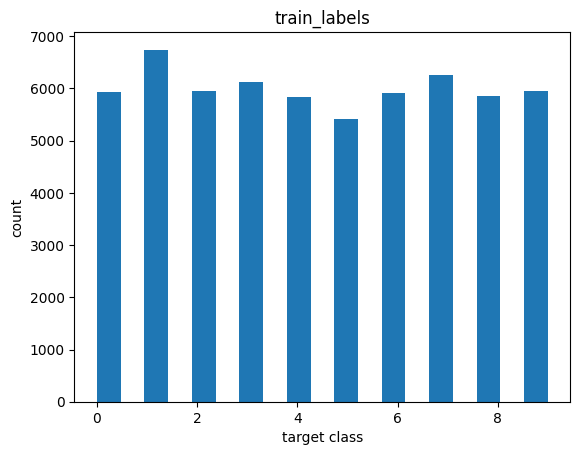

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Train_set Label type: %s'%str(train_labels.shape))
plt.hist(train_labels, bins=19)
plt.title('train_labels')
plt.xlabel('target class')
plt.ylabel('count')
plt.show()

Test_set Label type: (10000,)


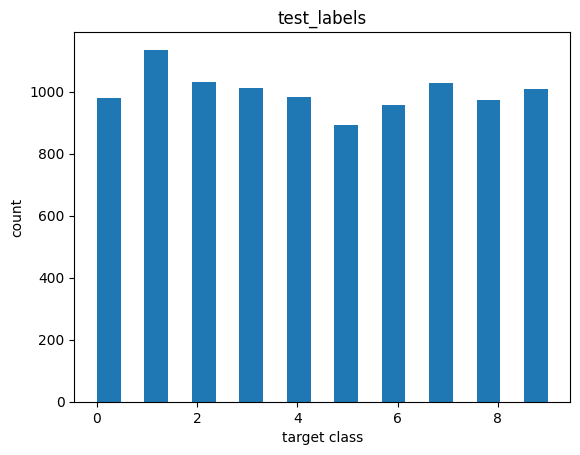

In [5]:
print('Test_set Label type: %s'%str(test_labels.shape))
plt.hist(test_labels, bins=19)
plt.title('test_labels')
plt.xlabel('target class')
plt.ylabel('count')
plt.show()

In [6]:
# Class
print('Feature Type: %s' %type(train_images))
print('Label Type: %s' %type(train_labels))

Feature Type: <class 'numpy.ndarray'>
Label Type: <class 'numpy.ndarray'>


In [7]:
# Shape
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


In [8]:
# Type
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### 2. Preprocess a data

In [9]:
# Reshape and Normalize
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

In [10]:
import tensorflow 
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
def plot_curve(history_opt):
    # loss curves
    plt.figure(figsize=[8,6])
    loss = history_opt.history['loss']
    val_loss = history_opt.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'orange', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

# Accuracy curves
    plt.figure(figsize=[8,6])
    acc = history_opt.history['accuracy']
    val_acc = history_opt.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'orange', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()  

In [13]:
def compare_plot(his1, his2, text1, text2):
    # loss curve
    plt.figure(figsize=[8,6])
    loss1 = his1.history['loss']
    val_loss1 = his1.history['val_loss']
    
    loss2 = his2.history['loss']
    val_loss2 = his2.history['val_loss']
    epochs = range(1, len(loss1) + 1)
    
    plt.plot(epochs, loss1, 'orange', label='%s Training loss'%str(text1))
    plt.plot(epochs, val_loss1, 'orange', linestyle = 'dashed', label='%s Validation loss'%str(text1))
    
    plt.plot(epochs, loss2, 'b', label='%s Training loss'%str(text2))
    plt.plot(epochs, val_loss2, 'b', linestyle = 'dashed', label='%s Validation loss'%str(text2))
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    plt.figure(figsize=[8,6])
    acc1 = his1.history['accuracy']
    val_acc1 = his1.history['val_accuracy']
    
    acc2 = his2.history['accuracy']
    val_acc2 = his2.history['val_accuracy']
    epochs = range(1, len(acc1) + 1)
    
    plt.plot(epochs, acc1, 'orange', label='%s Training acc'%str(text1))
    plt.plot(epochs, val_acc1, 'orange', linestyle = 'dashed', label='%s Validation acc'%str(text1))
    
    plt.plot(epochs, acc2, 'b', label='%s Training acc'%str(text2))
    plt.plot(epochs, val_acc2, 'b', linestyle = 'dashed', label='%s Validation acc'%str(text2))
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

### 3. Build a model 

Build a five-fully connected layer with 128 neurons each, *elu* as an activation function, and *he initialier* as a weight initialier function using `Sequential()`.
 
The output is a probability for each target class using *softmax* as an activation function. We will use the *Adam optimizer* with the *cross-entropy loss function*.

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import initializers

In [15]:
def baseline_model():
    base_network = models.Sequential()
    base_network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,)))
    base_network.add(layers.Dense(128, activation='elu'))
    base_network.add(layers.Dense(128, activation='elu'))
    base_network.add(layers.Dense(128, activation='elu'))
    base_network.add(layers.Dense(128, activation='elu'))
    base_network.add(layers.Dense(128, activation='elu'))
    base_network.add(layers.Dense(10, activation='softmax'))
    base_network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return base_network

In [16]:
initailizer = tensorflow.keras.initializers.HeNormal()
values = initailizer(shape=(28,28))
values

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[-3.48563343e-01,  3.53064016e-02, -2.00784668e-01,
         2.23986983e-01, -6.88782558e-02,  4.03944552e-01,
         2.01084346e-01, -4.06651124e-02, -6.12714551e-02,
        -1.33229494e-02, -3.72123688e-01,  9.31900144e-02,
         3.22212666e-01, -2.40637347e-01, -1.82471082e-01,
         3.65131438e-01, -8.33664611e-02,  1.00083530e-01,
         3.23543668e-01,  3.35615993e-01,  3.85302573e-01,
        -2.12796748e-01,  5.69418132e-01,  1.68427274e-01,
        -4.56487155e-03,  3.90732110e-01, -5.50579607e-01,
        -4.46666420e-01],
       [ 5.28219044e-02, -1.26170859e-01,  2.28815705e-01,
         2.64463067e-01,  4.20367390e-01,  6.34472072e-02,
         1.31839067e-01, -3.65407974e-01,  6.63412586e-02,
        -5.25029283e-03, -3.47869873e-01,  5.10472000e-01,
        -2.84377605e-01,  2.55494595e-01, -5.87399781e-01,
        -2.15052769e-01,  9.58060026e-02,  3.01003316e-03,
        -1.37529641e-01, -4.45435375e-0

In [17]:
def model_network():
  initializer = tensorflow.keras.initializers.HeNormal()
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

### 4. Train the model

We will train the model with 10 epochs and a batch size of 128.

To avoid information leakage to the test set, which would lead to overfitting, we will divide the data into three sets: train, test, and validation. Hence, we will divide the training data into 90% train set and 10% validation set.

Because the keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be evenly distributed in validation set. As a result, we must use sklearn's `train_test_split` function to divide the data into train and validation sets.

Hint: Use the parameter `stratify = y` in `train_test_split()`
See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

### Split data ###
test_size = 0.1
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=test_size, stratify=train_labels)

## X is images, y is label
##################

In [19]:
## Baseline model
network_baseline = baseline_model()
history_baseline = network_baseline.fit(X_train, y_train, epochs=10, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/10
422/422 [==============================] - 4s 8ms/step - loss: 0.4746 - accuracy: 0.8559 - val_loss: 0.1839 - val_accuracy: 0.9418
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1530 - accuracy: 0.9529 - val_loss: 0.1299 - val_accuracy: 0.9582
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1060 - accuracy: 0.9671 - val_loss: 0.1222 - val_accuracy: 0.9608
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0795 - accuracy: 0.9740 - val_loss: 0.1068 - val_accuracy: 0.9665
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0711 - accuracy: 0.9765 - val_loss: 0.1086 - val_accuracy: 0.9705
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0612 - accuracy: 0.9804 - val_loss: 0.0934 - val_accuracy: 0.9722
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0477 - accuracy: 0.9836 - val_loss: 0.0977 - val_accuracy: 0.9735
Epoch 

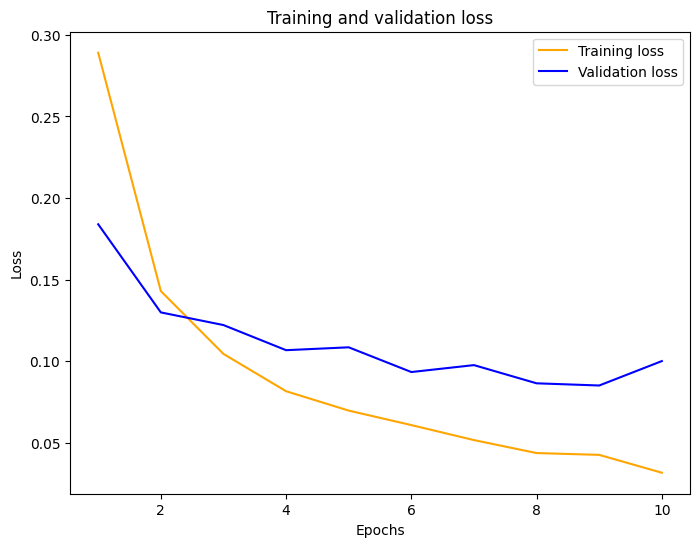

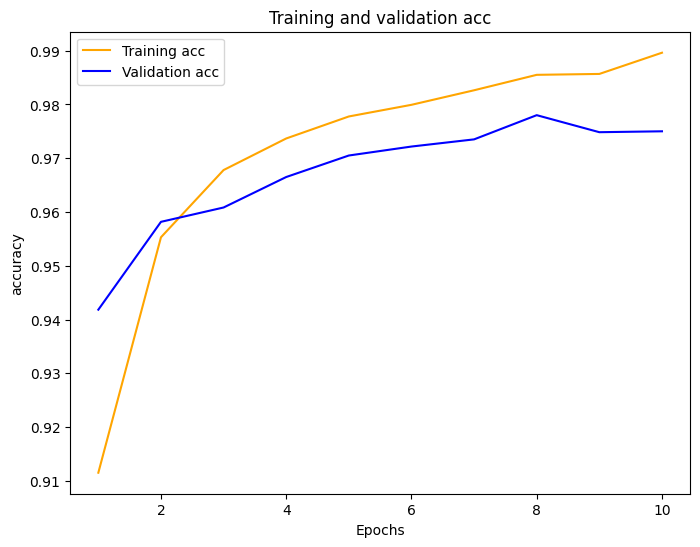

In [20]:
plot_curve(history_baseline)

In [21]:
### He Normal
network1 = model_network()
history = network1.fit(X_train, y_train, epochs=10, batch_size=128 ,validation_data=(X_val, y_val))
#####################

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 0.4366 - accuracy: 0.8618 - val_loss: 0.1411 - val_accuracy: 0.9555
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1188 - accuracy: 0.9622 - val_loss: 0.1115 - val_accuracy: 0.9638
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0809 - accuracy: 0.9740 - val_loss: 0.1002 - val_accuracy: 0.9693
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0659 - accuracy: 0.9785 - val_loss: 0.1055 - val_accuracy: 0.9673
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0527 - accuracy: 0.9824 - val_loss: 0.1026 - val_accuracy: 0.9700
Epoch 6/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 0.1065 - val_accuracy: 0.9712
Epoch 7/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0435 - accuracy: 0.9855 - val_loss: 0.1059 - val_accuracy: 0.9687
Epoch 

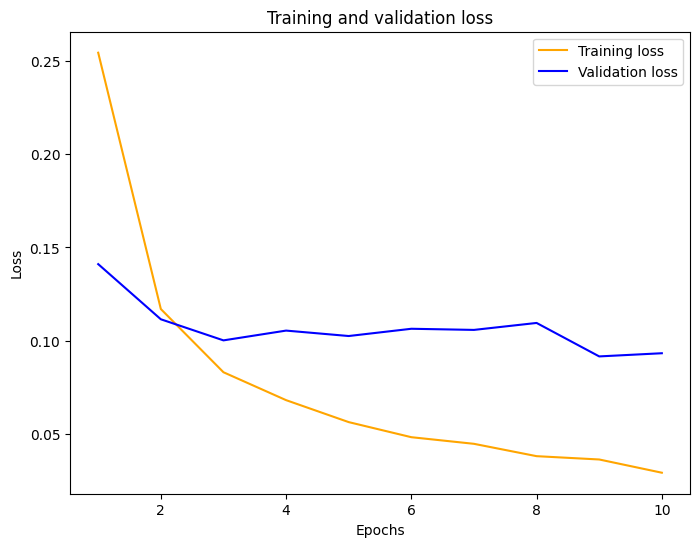

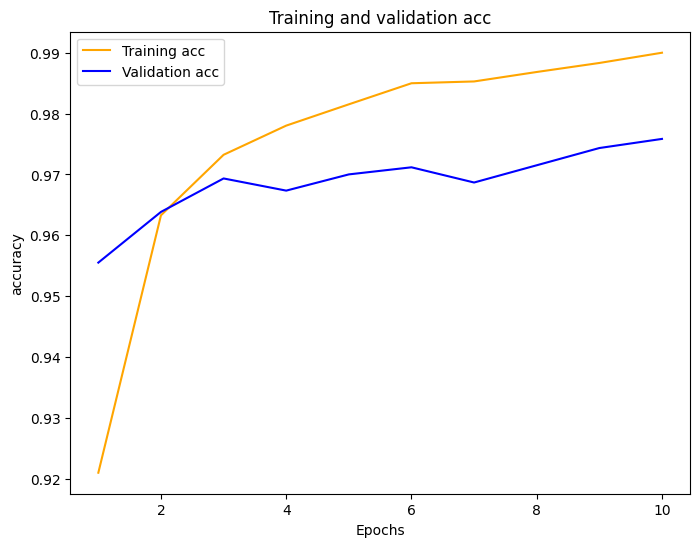

In [22]:
plot_curve(history)

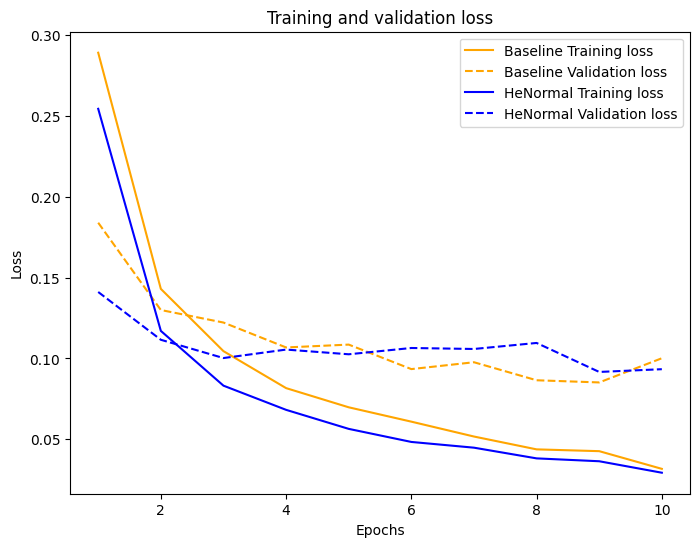

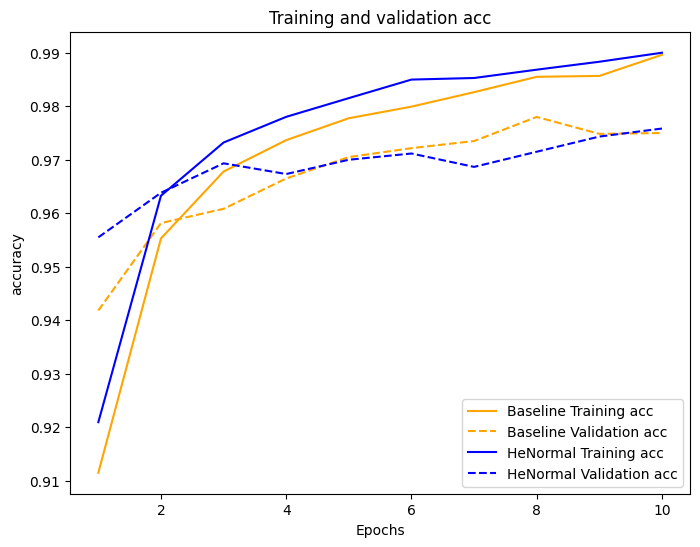

In [23]:
compare_plot(history_baseline, history,'Baseline','HeNormal')

### 5. Evalute the model

Consider the metric you want to use to evaluate/measure the performance of your model in order to answer the following questions:
1. Is the model overfit or underfit?
2. At what epoch/iteration does it converge or does the model overfit?
3. How does the model perform across all data classes? What is your model's overall performance?


In [24]:
### Evaluate the baseline model ###
test_loss_base, test_acc_base = network_baseline.evaluate(test_images, test_labels)
print('Test Loss Baseline: %s\nTest Accuracy Baseline: %s' % (test_loss_base,test_acc_base))

313/313 [==============================] - 1s 3ms/step - loss: 0.0918 - accuracy: 0.9760
Test Loss Baseline: 0.09175893664360046
Test Accuracy Baseline: 0.9760000109672546


In [25]:
### Evaluate the He initializer model ###
test_loss, test_acc = network1.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

313/313 [==============================] - 1s 3ms/step - loss: 0.0944 - accuracy: 0.9756
Test Loss: 0.09441515803337097
Test Accuracy: 0.975600004196167


#### Discussion between baseline & He initializers

เมื่อ model ลองใน test set พบว่า test loss และ test accuracy ของ He initializer น้อยกว่า baseline เพราะว่ามีการ initialize weight ในทุก layer เพื่อไม่ให้ neuron ใด neuron นึงตาย เมื่อมีการใช้ ReLU activation 

#### Answer

1. Model overfit (low bias, high variance)
2. Epoch at 4
3. Accuracy 97.56%

### 6. Tune the model 

Try to tune your model by: 
1. Try increasing the number of epochs to see how it affects your model? Does the results improve or become overfit?
2. Apply an early stop. What do you get as a result? (See also https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/)
4. Try adding regularizers l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try adding dropout (any dropout rate) with every layer. What effect does it have on your model? Does it help in the reduction of overfit?

*In the discussion section, discuss the result of these steps*

After completing the preceding steps, **try to achieve the highest precision** by tuning the model using what you have already learned in class. You can experiment with changing the model's structure by increasing or decreasing the number of layers and neuron nodes in each layer. (Use only fully-connected layers for now; no other types of layers!)

**The MNIST model's current highest precision is around 99.8%** (Just try as hard as you can; don't be concerned if you don't achieve this level of precision.)

**In each tuning step, write down what you're doing and why**

### 1. Try increasing the number of epochs to see how it affects your model? Does the results improve or become overfit?

In [26]:
network2 = model_network()
history2 = network2.fit(X_train, y_train, epochs=25, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/25
422/422 [==============================] - 3s 7ms/step - loss: 0.4565 - accuracy: 0.8567 - val_loss: 0.1539 - val_accuracy: 0.9500
Epoch 2/25
422/422 [==============================] - 3s 6ms/step - loss: 0.1220 - accuracy: 0.9619 - val_loss: 0.1210 - val_accuracy: 0.9638
Epoch 3/25
422/422 [==============================] - 2s 6ms/step - loss: 0.0852 - accuracy: 0.9718 - val_loss: 0.1177 - val_accuracy: 0.9640
Epoch 4/25
422/422 [==============================] - 2s 5ms/step - loss: 0.0639 - accuracy: 0.9794 - val_loss: 0.0936 - val_accuracy: 0.9710
Epoch 5/25
422/422 [==============================] - 2s 5ms/step - loss: 0.0520 - accuracy: 0.9829 - val_loss: 0.1277 - val_accuracy: 0.9623
Epoch 6/25
422/422 [==============================] - 2s 5ms/step - loss: 0.0465 - accuracy: 0.9846 - val_loss: 0.0984 - val_accuracy: 0.9702
Epoch 7/25
422/422 [==============================] - 2s 5ms/step - loss: 0.0438 - accuracy: 0.9858 - val_loss: 0.1134 - val_accuracy: 0.9687
Epoch 

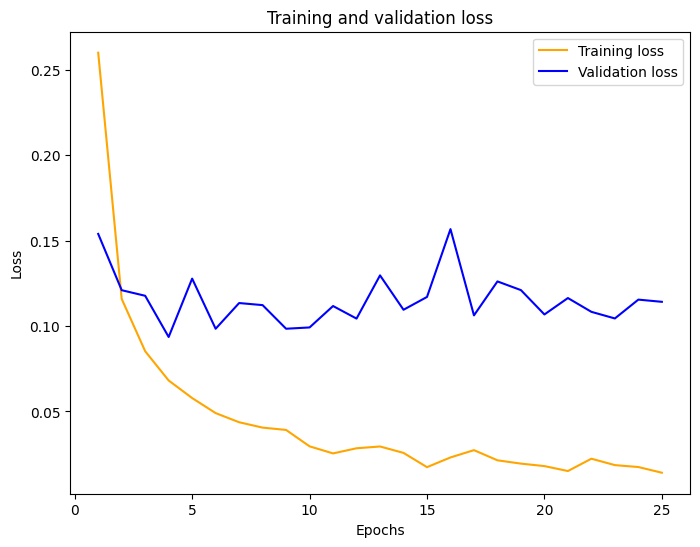

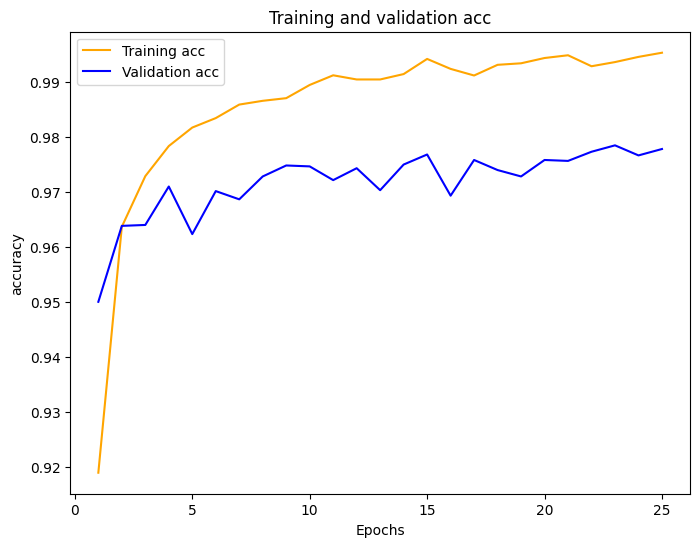

In [27]:
plot_curve(history2)

In [28]:
test_loss, test_acc = network2.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1193 - accuracy: 0.9762
Test Loss: 0.11928759515285492
Test Accuracy: 0.9761999845504761


#### Answer 6.1

เมื่อเพิ่ม epoch จาก 10 เป็น 25 พบว่า กราฟ loss มีแนวโน้มที่จะ overfit และในส่วนของ Test loss ยังเพิ่มขึ้นอีกด้วย ถ้าเทียบกับ epoch=10 แต่มี accuracy ที่สูงกว่า คิดว่าตัว model จับ noise มาใช้ในการเทรนด้วย

### 2. Apply an early stop. What do you get as a result?

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, mode='min', verbose=1),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
]


In [30]:
network3 = model_network()
history3 = network3.fit(X_train, y_train, 
                       epochs=25, 
                       batch_size=128 ,
                       validation_data=(X_val, y_val),
                       callbacks=keras_callbacks,
                       verbose=2
                       )

Epoch 1/25
422/422 - 2s - loss: 0.2602 - accuracy: 0.9190 - val_loss: 0.1642 - val_accuracy: 0.9490

Epoch 00001: val_loss improved from inf to 0.16423, saving model to best_model.h5
Epoch 2/25
422/422 - 1s - loss: 0.1218 - accuracy: 0.9627 - val_loss: 0.1086 - val_accuracy: 0.9650

Epoch 00002: val_loss improved from 0.16423 to 0.10863, saving model to best_model.h5
Epoch 3/25
422/422 - 2s - loss: 0.0835 - accuracy: 0.9731 - val_loss: 0.0954 - val_accuracy: 0.9698

Epoch 00003: val_loss improved from 0.10863 to 0.09541, saving model to best_model.h5
Epoch 4/25
422/422 - 1s - loss: 0.0693 - accuracy: 0.9774 - val_loss: 0.1070 - val_accuracy: 0.9688

Epoch 00004: val_loss did not improve from 0.09541
Epoch 5/25
422/422 - 1s - loss: 0.0583 - accuracy: 0.9811 - val_loss: 0.0832 - val_accuracy: 0.9742

Epoch 00005: val_loss improved from 0.09541 to 0.08325, saving model to best_model.h5
Epoch 6/25
422/422 - 2s - loss: 0.0479 - accuracy: 0.9842 - val_loss: 0.1123 - val_accuracy: 0.9693

Epo

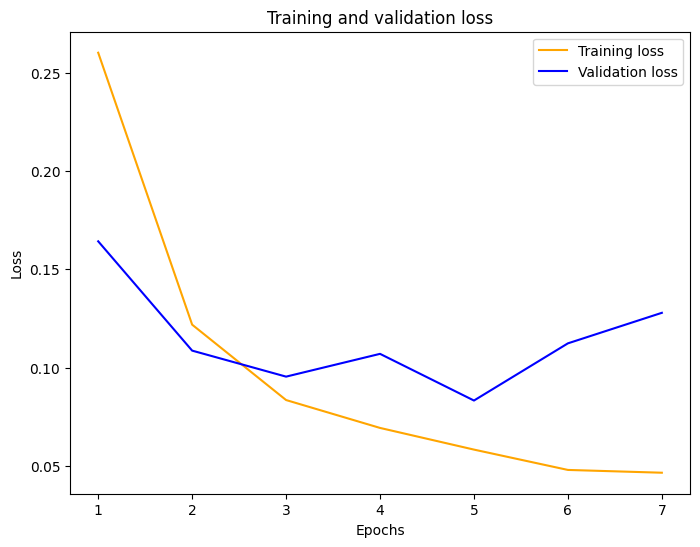

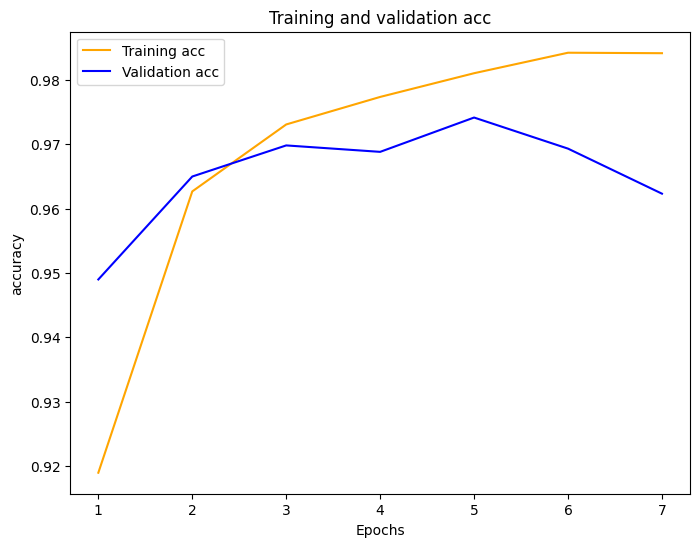

In [31]:
plot_curve(history3)

In [32]:
### Evaluate the model ###
test_loss2, test_acc2 = network2.evaluate(test_images, test_labels)
print('Test Loss of Non early stop: %s\nTest Accuracy: %s' % (test_loss2,test_acc2))

test_loss3, test_acc3 = network3.evaluate(test_images, test_labels)
print('Test Loss of Early stop: %s\nTest Accuracy: %s' % (test_loss3,test_acc3))
##########################

313/313 [==============================] - 1s 2ms/step - loss: 0.1193 - accuracy: 0.9762
Test Loss of Non early stop: 0.11928759515285492
Test Accuracy: 0.9761999845504761
313/313 [==============================] - 1s 2ms/step - loss: 0.1104 - accuracy: 0.9688
Test Loss of Early stop: 0.11040821671485901
Test Accuracy: 0.9688000082969666


#### Answer Question 6.2

At the epoch 7/25 is early stopping. And the history3 (Use early stopping) looking better than history2 (Non use early stopping) model. Accuracy reduce to 96.88% but avoid overfitting model.

### 3. Try adding regularizers l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?

#### 3.1.1 Try regularizers L1 with kernel+bias

In [49]:
## 3.1.1
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def model_network_L1():
    initializer = tensorflow.keras.initializers.HeNormal()
    alpha = 1e-4
    network = models.Sequential()
    network.add(layers.Dense(128, activation='elu', input_shape=(28*28,),kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network


In [50]:
network_L1 = model_network_L1()
history_L1 = network_L1.fit(X_train, y_train, epochs=25, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/25
422/422 [==============================] - 4s 7ms/step - loss: 1.5513 - accuracy: 0.8620 - val_loss: 1.1063 - val_accuracy: 0.9535
Epoch 2/25
422/422 [==============================] - 3s 7ms/step - loss: 1.0504 - accuracy: 0.9590 - val_loss: 0.9508 - val_accuracy: 0.9563
Epoch 3/25
422/422 [==============================] - 3s 7ms/step - loss: 0.8888 - accuracy: 0.9688 - val_loss: 0.8408 - val_accuracy: 0.9568
Epoch 4/25
422/422 [==============================] - 3s 7ms/step - loss: 0.7683 - accuracy: 0.9695 - val_loss: 0.7157 - val_accuracy: 0.9635
Epoch 5/25
422/422 [==============================] - 3s 7ms/step - loss: 0.6759 - accuracy: 0.9701 - val_loss: 0.6323 - val_accuracy: 0.9685
Epoch 6/25
422/422 [==============================] - 3s 7ms/step - loss: 0.6024 - accuracy: 0.9703 - val_loss: 0.5946 - val_accuracy: 0.9572
Epoch 7/25
422/422 [==============================] - 3s 7ms/step - loss: 0.5448 - accuracy: 0.9680 - val_loss: 0.5283 - val_accuracy: 0.9618
Epoch 

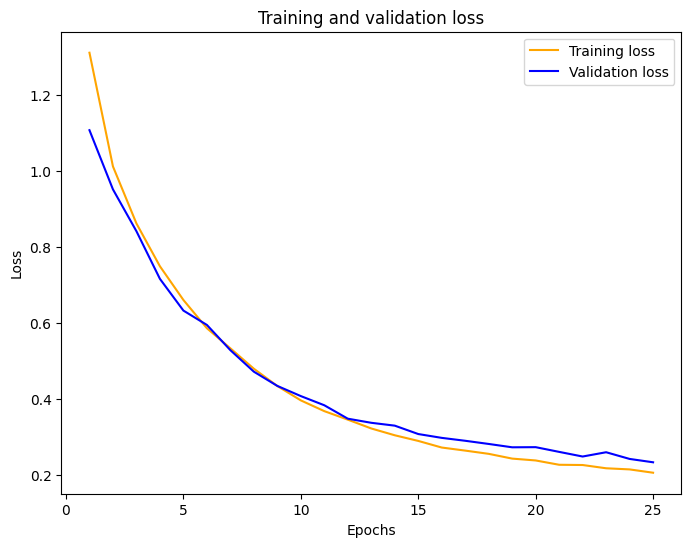

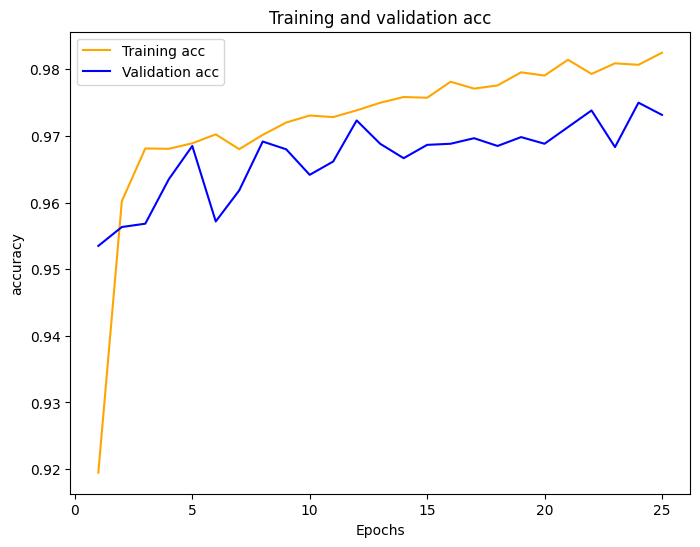

In [51]:
plot_curve(history_L1)

In [52]:
### Evaluate the model ###
test_loss, test_acc = network_L1.evaluate(test_images, test_labels)
print('Test Loss of network_L1 kernel+bias: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.2256 - accuracy: 0.9757
Test Loss of network_L1 kernel+bias: 0.22564809024333954
Test Accuracy: 0.9757000207901001


#### 3.1.2 Try L1 with Activity regularization

In [53]:
def model_network_L1_activity():
    initializer = tensorflow.keras.initializers.HeNormal()
    alpha = 1e-4
    network = models.Sequential()
    network.add(layers.Dense(128, activation='elu', input_shape=(28*28,),kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network

In [54]:
network_L1_activity = model_network_L1_activity()
history_L1_activity = network_L1_activity.fit(X_train, y_train, epochs=25, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/25
422/422 [==============================] - 4s 9ms/step - loss: 0.5183 - accuracy: 0.8529 - val_loss: 0.2001 - val_accuracy: 0.9545
Epoch 2/25
422/422 [==============================] - 3s 8ms/step - loss: 0.1673 - accuracy: 0.9657 - val_loss: 0.1909 - val_accuracy: 0.9587
Epoch 3/25
422/422 [==============================] - 3s 8ms/step - loss: 0.1411 - accuracy: 0.9723 - val_loss: 0.1589 - val_accuracy: 0.9677
Epoch 4/25
422/422 [==============================] - 3s 8ms/step - loss: 0.1182 - accuracy: 0.9792 - val_loss: 0.1600 - val_accuracy: 0.9677
Epoch 5/25
422/422 [==============================] - 3s 7ms/step - loss: 0.1082 - accuracy: 0.9823 - val_loss: 0.1339 - val_accuracy: 0.9752
Epoch 6/25
422/422 [==============================] - 3s 8ms/step - loss: 0.0935 - accuracy: 0.9874 - val_loss: 0.1512 - val_accuracy: 0.9698
Epoch 7/25
422/422 [==============================] - 4s 9ms/step - loss: 0.0926 - accuracy: 0.9872 - val_loss: 0.1765 - val_accuracy: 0.9647
Epoch 

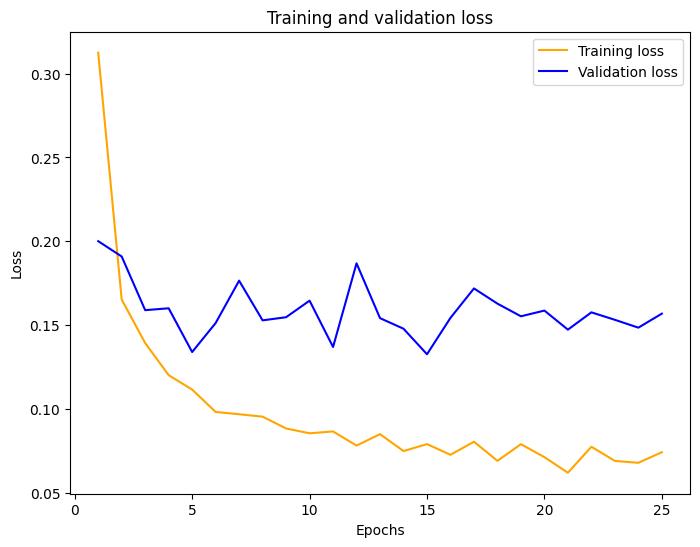

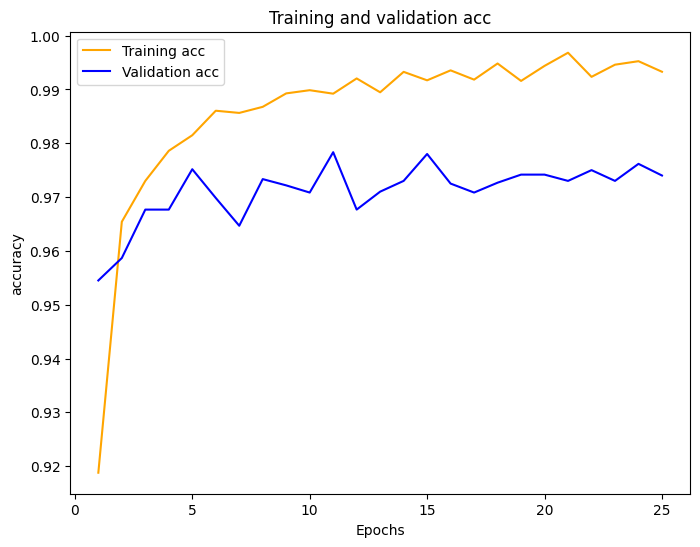

In [55]:
plot_curve(history_L1_activity)

In [56]:
### Evaluate the model ###
test_loss, test_acc = network_L1_activity.evaluate(test_images, test_labels)
print('Test Loss of network_L1 activity: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.1498 - accuracy: 0.9786
Test Loss of network_L1 activity: 0.1497553586959839
Test Accuracy: 0.978600025177002


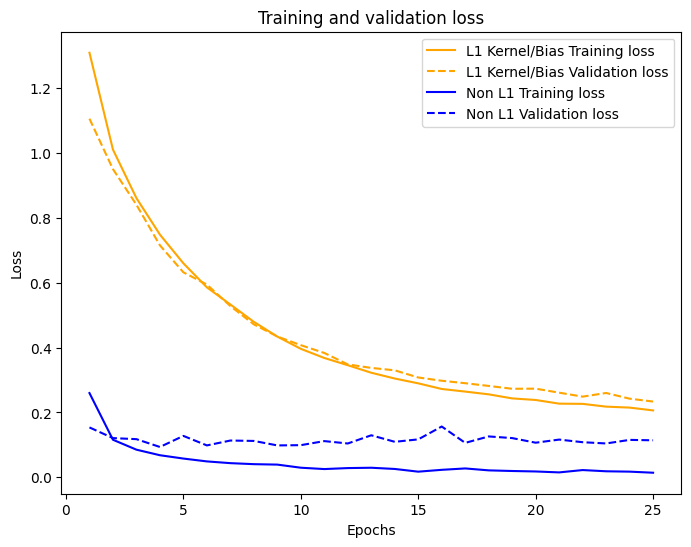

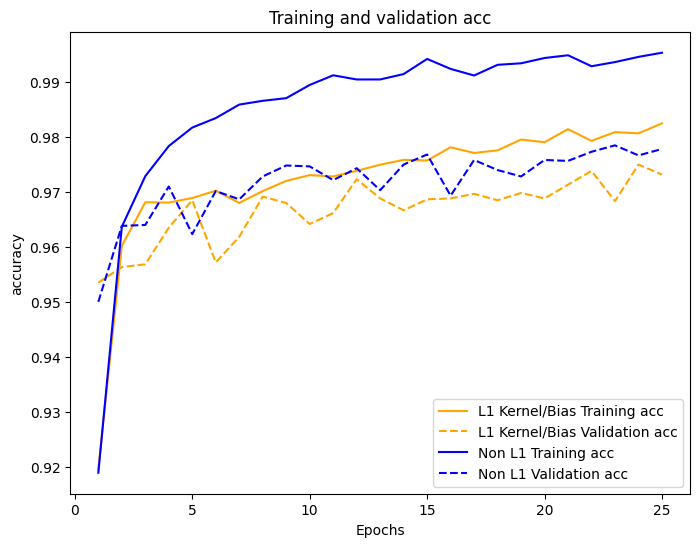

In [57]:
compare_plot(history_L1, history2,'L1 Kernel/Bias','Non L1')

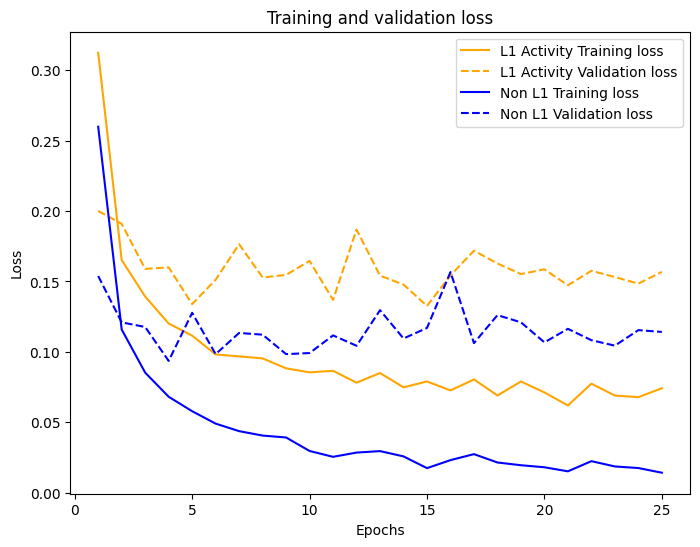

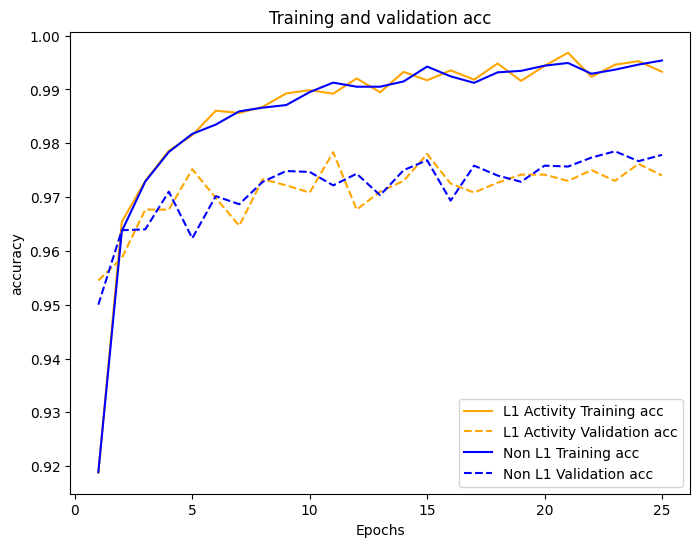

In [58]:
compare_plot(history_L1_activity, history2,'L1 Activity','Non L1')

#### 3.2.1 Try L2 Kernel/Bias

In [59]:
## 3.2.1 
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def model_network_L2():
  initializer = tensorflow.keras.initializers.HeNormal()
  alpha = 1e-4
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

In [60]:
network_L2 = model_network_L2()
history_L2 = network_L2.fit(X_train, y_train, epochs=25, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/25
422/422 [==============================] - 4s 8ms/step - loss: 0.5930 - accuracy: 0.8621 - val_loss: 0.2994 - val_accuracy: 0.9507
Epoch 2/25
422/422 [==============================] - 3s 8ms/step - loss: 0.2659 - accuracy: 0.9609 - val_loss: 0.2440 - val_accuracy: 0.9688
Epoch 3/25
422/422 [==============================] - 3s 8ms/step - loss: 0.2223 - accuracy: 0.9728 - val_loss: 0.2349 - val_accuracy: 0.9675
Epoch 4/25
422/422 [==============================] - 3s 8ms/step - loss: 0.2009 - accuracy: 0.9787 - val_loss: 0.2241 - val_accuracy: 0.9698
Epoch 5/25
422/422 [==============================] - 3s 7ms/step - loss: 0.1868 - accuracy: 0.9807 - val_loss: 0.2292 - val_accuracy: 0.9692
Epoch 6/25
422/422 [==============================] - 3s 8ms/step - loss: 0.1730 - accuracy: 0.9830 - val_loss: 0.2075 - val_accuracy: 0.9720
Epoch 7/25
422/422 [==============================] - 3s 7ms/step - loss: 0.1661 - accuracy: 0.9841 - val_loss: 0.2002 - val_accuracy: 0.9747
Epoch 

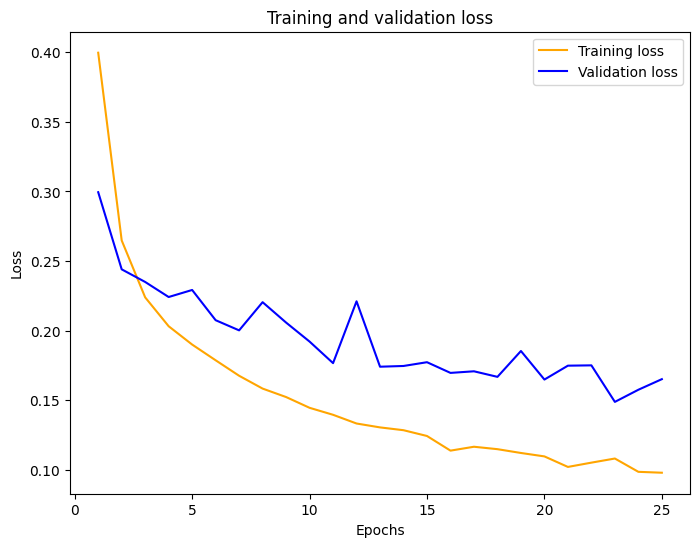

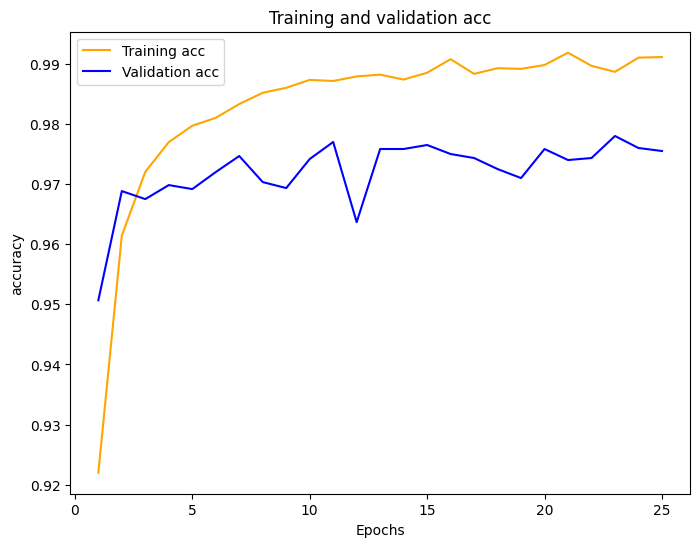

In [61]:
plot_curve(history_L2)

In [62]:
### Evaluate the model ###
test_loss, test_acc = network_L2.evaluate(test_images, test_labels)
print('Test Loss of network_L2 Kernel/Bias: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.1494 - accuracy: 0.9775
Test Loss of network_L2 Kernel/Bias: 0.149419903755188
Test Accuracy: 0.9775000214576721


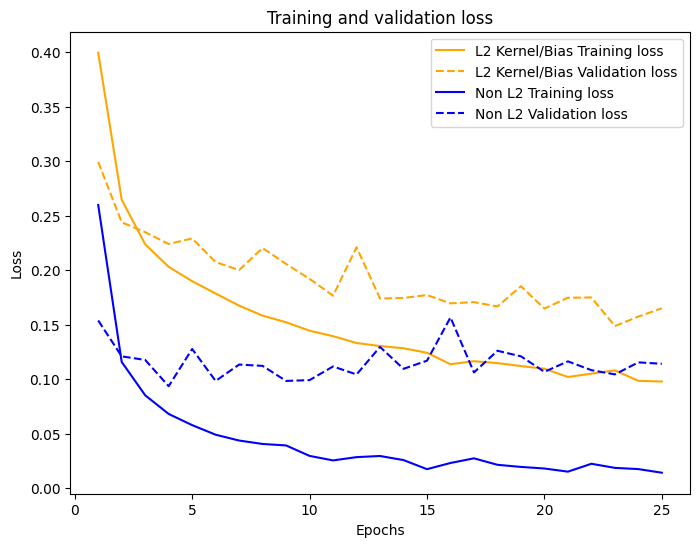

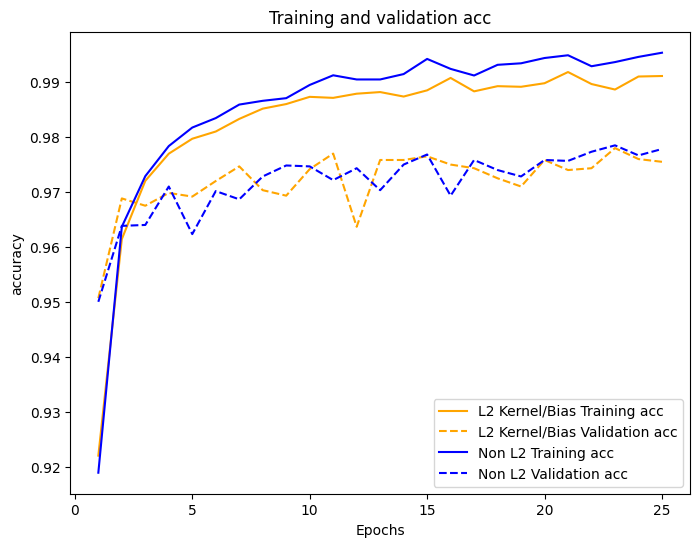

In [63]:
compare_plot(history_L2, history2,'L2 Kernel/Bias','Non L2')

#### 3.2.2 Try L2 with Activity

In [67]:
def model_network_L2_activity():
  initializer = tensorflow.keras.initializers.HeNormal()
  alpha = 1e-4
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

In [68]:
network_L2_activity = model_network_L2_activity()
history_L2_activity = network_L2_activity.fit(X_train, y_train, epochs=25, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/25
422/422 [==============================] - 4s 9ms/step - loss: 0.5114 - accuracy: 0.8562 - val_loss: 0.1727 - val_accuracy: 0.9627
Epoch 2/25
422/422 [==============================] - 3s 8ms/step - loss: 0.1686 - accuracy: 0.9616 - val_loss: 0.1492 - val_accuracy: 0.9692
Epoch 3/25
422/422 [==============================] - 3s 8ms/step - loss: 0.1287 - accuracy: 0.9721 - val_loss: 0.1450 - val_accuracy: 0.9697
Epoch 4/25
422/422 [==============================] - 3s 8ms/step - loss: 0.1039 - accuracy: 0.9796 - val_loss: 0.1319 - val_accuracy: 0.9727
Epoch 5/25
422/422 [==============================] - 3s 8ms/step - loss: 0.0944 - accuracy: 0.9821 - val_loss: 0.1722 - val_accuracy: 0.9627
Epoch 6/25
422/422 [==============================] - 4s 9ms/step - loss: 0.0862 - accuracy: 0.9845 - val_loss: 0.1510 - val_accuracy: 0.9673
Epoch 7/25
422/422 [==============================] - 4s 8ms/step - loss: 0.0826 - accuracy: 0.9853 - val_loss: 0.1335 - val_accuracy: 0.9725
Epoch 

In [69]:
### Evaluate the model ###
test_loss, test_acc = network_L2_activity.evaluate(test_images, test_labels)
print('Test Loss of network_L2 Activity: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.1406 - accuracy: 0.9756
Test Loss of network_L2 Activity: 0.14056596159934998
Test Accuracy: 0.975600004196167


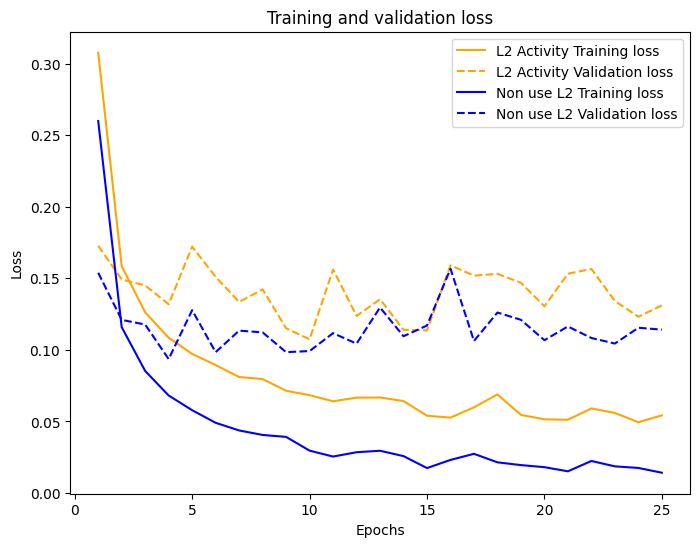

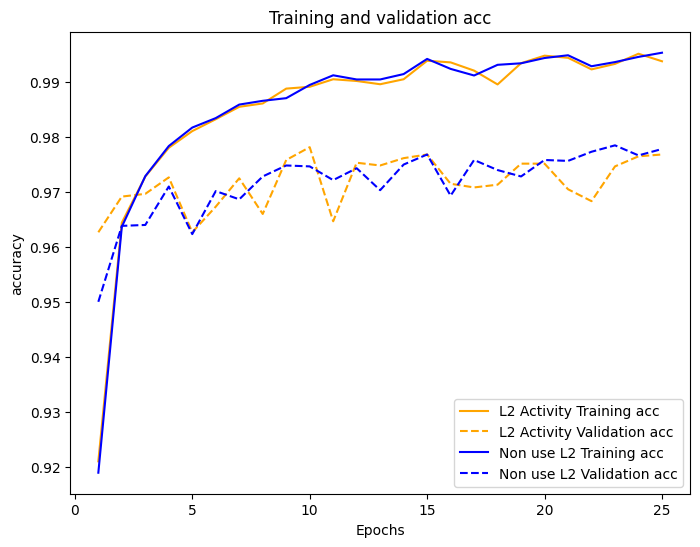

In [70]:
compare_plot(history_L2_activity, history2,'L2 Activity', 'Non use L2')

#### 3.3.1 Try L1L2 with Kernel/Bias

In [71]:
## 3.3 Using L1 L2
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def model_network_L1L2():
  initializer = tensorflow.keras.initializers.HeNormal()
  alpha1 = 1e-4
  alpha2 = 1e-4
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))

  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
    
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))

  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
    
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))

  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

In [72]:
network_L1L2 = model_network_L1L2()
history_L1L2 = network_L1L2.fit(X_train, y_train, epochs=25, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/25
422/422 [==============================] - 4s 8ms/step - loss: 1.7303 - accuracy: 0.8542 - val_loss: 1.2046 - val_accuracy: 0.9530
Epoch 2/25
422/422 [==============================] - 3s 7ms/step - loss: 1.1325 - accuracy: 0.9599 - val_loss: 1.0016 - val_accuracy: 0.9568
Epoch 3/25
422/422 [==============================] - 3s 8ms/step - loss: 0.9364 - accuracy: 0.9644 - val_loss: 0.8383 - val_accuracy: 0.9612
Epoch 4/25
422/422 [==============================] - 3s 8ms/step - loss: 0.7924 - accuracy: 0.9663 - val_loss: 0.7410 - val_accuracy: 0.9528
Epoch 5/25
422/422 [==============================] - 3s 8ms/step - loss: 0.6759 - accuracy: 0.9667 - val_loss: 0.6253 - val_accuracy: 0.9620
Epoch 6/25
422/422 [==============================] - 3s 8ms/step - loss: 0.5791 - accuracy: 0.9691 - val_loss: 0.5752 - val_accuracy: 0.9548
Epoch 7/25
422/422 [==============================] - 3s 8ms/step - loss: 0.5178 - accuracy: 0.9670 - val_loss: 0.4895 - val_accuracy: 0.9615
Epoch 

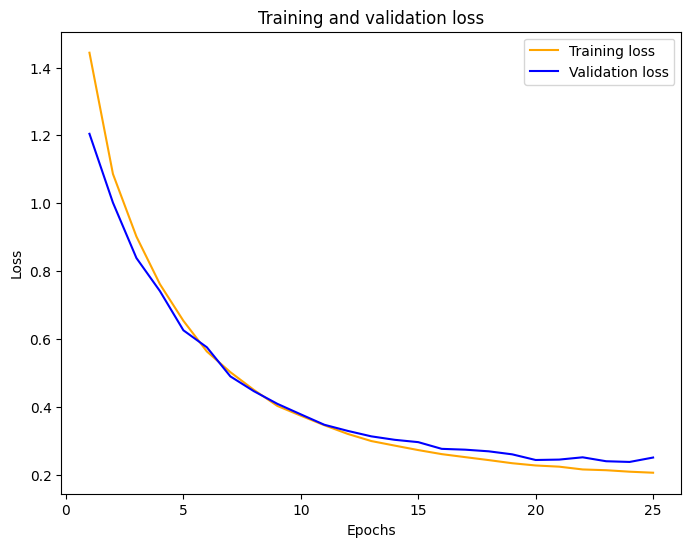

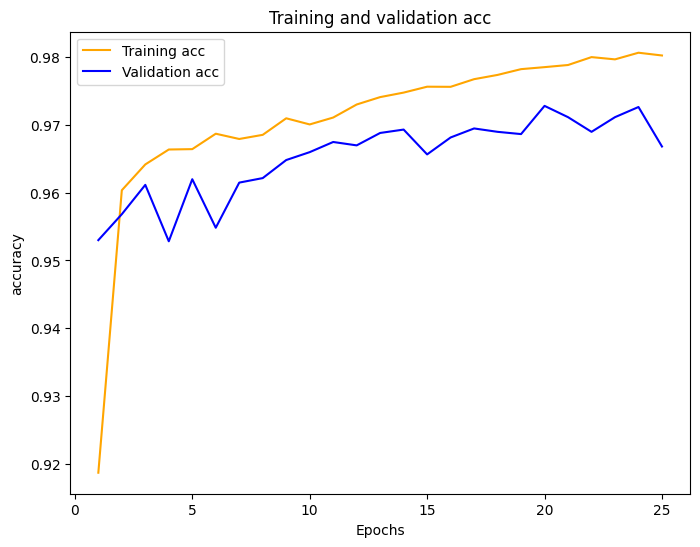

In [73]:
plot_curve(history_L1L2)

In [74]:
### Evaluate the model ###
test_loss, test_acc = network_L1L2.evaluate(test_images, test_labels)
print('Test Loss of L1L2 Kernel/Bias: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.2323 - accuracy: 0.9728
Test Loss of L1L2 Kernel/Bias: 0.23226843774318695
Test Accuracy: 0.9728000164031982


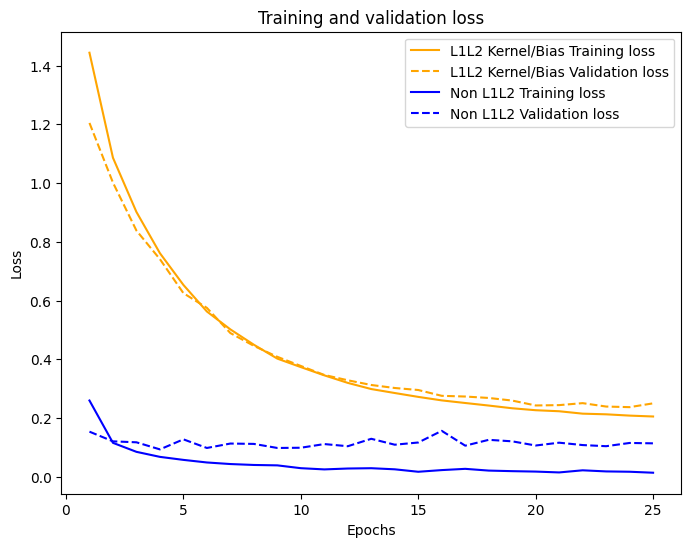

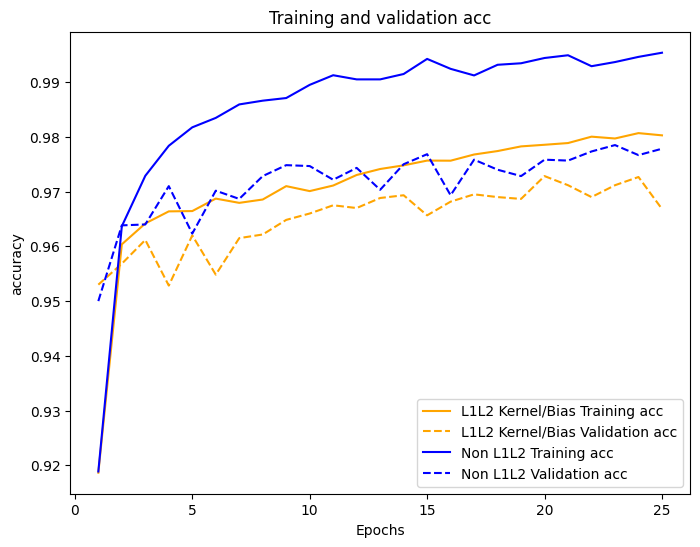

In [75]:
compare_plot(history_L1L2, history2,'L1L2 Kernel/Bias','Non L1L2')

#### 3.3.2 Try L1L2 with Activity

In [76]:
def model_network_L1L2_activity():
  initializer = tensorflow.keras.initializers.HeNormal()    
  alpha1 = 1e-4
  alpha2 = 1e-4
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

In [77]:
network_L1L2_activity = model_network_L1L2_activity()
history_L1L2_activity = network_L1L2_activity.fit(X_train, y_train, epochs=25, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/25
422/422 [==============================] - 5s 10ms/step - loss: 0.5198 - accuracy: 0.8643 - val_loss: 0.2366 - val_accuracy: 0.9513
Epoch 2/25
422/422 [==============================] - 4s 9ms/step - loss: 0.2008 - accuracy: 0.9629 - val_loss: 0.1968 - val_accuracy: 0.9635
Epoch 3/25
422/422 [==============================] - 4s 9ms/step - loss: 0.1632 - accuracy: 0.9720 - val_loss: 0.1958 - val_accuracy: 0.9603
Epoch 4/25
422/422 [==============================] - 4s 9ms/step - loss: 0.1449 - accuracy: 0.9768 - val_loss: 0.1581 - val_accuracy: 0.9732
Epoch 5/25
422/422 [==============================] - 4s 9ms/step - loss: 0.1269 - accuracy: 0.9820 - val_loss: 0.1680 - val_accuracy: 0.9687
Epoch 6/25
422/422 [==============================] - 4s 9ms/step - loss: 0.1156 - accuracy: 0.9854 - val_loss: 0.1695 - val_accuracy: 0.9707
Epoch 7/25
422/422 [==============================] - 4s 9ms/step - loss: 0.1139 - accuracy: 0.9853 - val_loss: 0.1593 - val_accuracy: 0.9732
Epoch

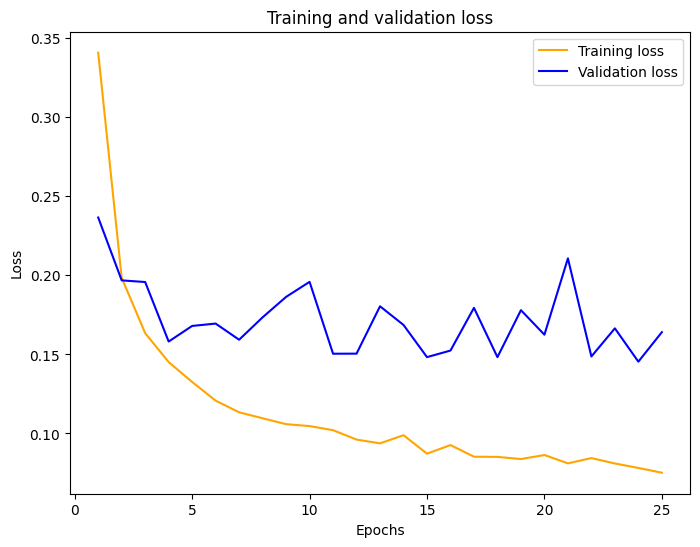

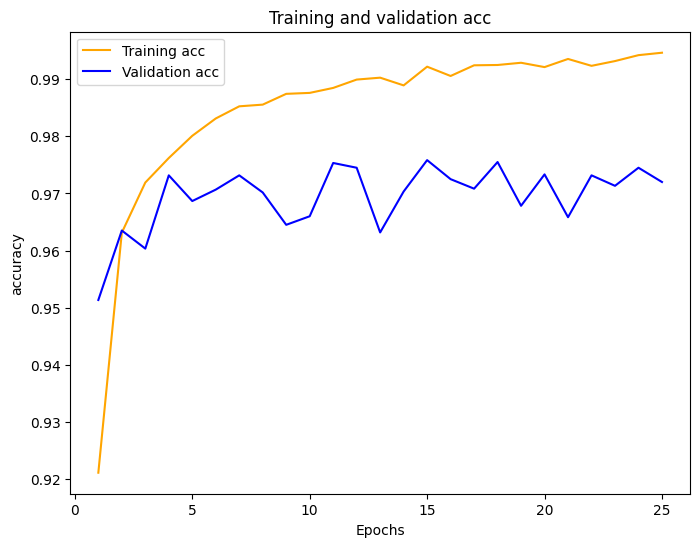

In [78]:
plot_curve(history_L1L2_activity)

In [79]:
### Evaluate the model ###
test_loss, test_acc = network_L1L2_activity.evaluate(test_images, test_labels)
print('Test Loss of L1L2 Activity: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.1721 - accuracy: 0.9730
Test Loss of L1L2 Activity: 0.17209681868553162
Test Accuracy: 0.9729999899864197


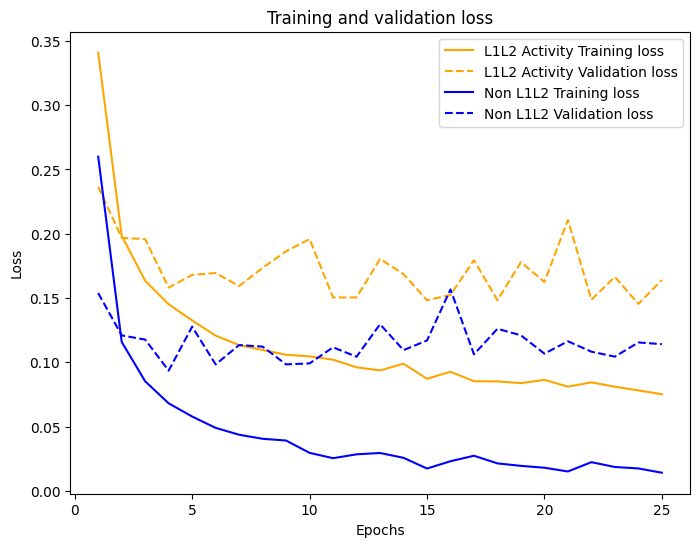

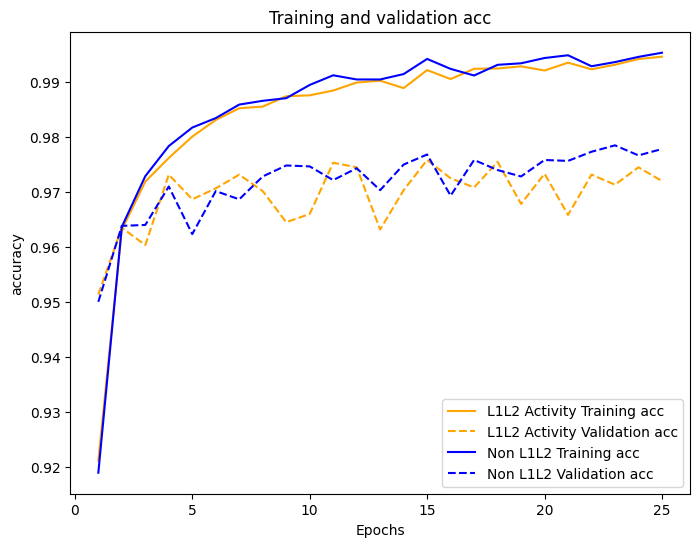

In [80]:
compare_plot(history_L1L2_activity, history2,'L1L2 Activity','Non L1L2')

#### Discussion trying add L1 or L2 regularizer with He initializer , learning rate at 1e-3

By,

- Kernel Regularizer: ลด weights 

- Bias Regularizer: ลด bias

- Activity Regularizer: ลด layer's output y กล่าวคือ จะทำการลด weight และปรับค่า bias ไปพร้อม ๆ กัน เพื่อทำให้ Wx+b มีค่าน้อยที่สุด

##### L1 Kernel/Bias 

วิเคราะห์จากกราฟ loss พบว่า val_loss ไม่มีการ overfit และ training loss ไม่เหวี่ยงไปมาจนมากเกินไป แต่เมื่อนำโมเดลไปทดลองกับ Test set 
พบว่ามีค่า loss มากกว่า กับ Accuracy น้อยกว่า Baseline model และ He initializer โดยรวมแล้วโมเดลนี้ค่อนข้างดี 


##### L1 Activity

วิเคราะห์จากกราฟ loss พบว่า val_loss ค่าค่อนข้างจะมี noise และ gap ไม่ generalize

##### L2 Kernel/Bias

วิเคราะห์จากกราฟ loss พบว่า val_loss ไม่มีการ overfit แต่ val_acc ไม่มีแนวโน้มสูงขึ้นเลย

##### L2 Activity

วิเคราะห์จากกราฟ loss พบว่า val_loss มี noise แต่ไม่มีแนวโน้มที่จะเกิด overfit กับโมเดล เมื่อลองกับ Test set พบว่า loss ค่อนข้างน้อย
และ accuracy ค่อนข้างดี  


##### L1/L2 Kernel/Bias

val_loss ยังมีการ overfit และ test loss ก็สูงขึ้น

##### L1/L2 Activity

val_loss ยังมีการ overfit และ test loss ลดลงจาก L1/L2 Kernel/Bias

โดยรวมแล้ว L2 Activity ดีที่สุด เพราะมีการลด weight และปรับ bias ในแต่ละ layer

### 4. Try adding dropout (any dropout rate) with every layer. What effect does it have on your model? Does it help in the reduction of overfit?

In [81]:
from tensorflow.keras.layers import Dropout

In [82]:
def model_network_dropout():
    initializer = tensorflow.keras.initializers.HeNormal()    
    network = models.Sequential()
    network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return network

In [83]:
network_dpo = model_network_dropout()
history_dpo = network_dpo.fit(X_train, y_train, epochs=25, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/25
422/422 [==============================] - 3s 6ms/step - loss: 1.1979 - accuracy: 0.6389 - val_loss: 0.2595 - val_accuracy: 0.9223
Epoch 2/25
422/422 [==============================] - 2s 5ms/step - loss: 0.4140 - accuracy: 0.8783 - val_loss: 0.2184 - val_accuracy: 0.9337
Epoch 3/25
422/422 [==============================] - 2s 5ms/step - loss: 0.3196 - accuracy: 0.9067 - val_loss: 0.1795 - val_accuracy: 0.9468
Epoch 4/25
422/422 [==============================] - 2s 5ms/step - loss: 0.2702 - accuracy: 0.9216 - val_loss: 0.1526 - val_accuracy: 0.9537
Epoch 5/25
422/422 [==============================] - 2s 5ms/step - loss: 0.2352 - accuracy: 0.9303 - val_loss: 0.1491 - val_accuracy: 0.9530
Epoch 6/25
422/422 [==============================] - 2s 5ms/step - loss: 0.2141 - accuracy: 0.9374 - val_loss: 0.1282 - val_accuracy: 0.9610
Epoch 7/25
422/422 [==============================] - 2s 5ms/step - loss: 0.1972 - accuracy: 0.9437 - val_loss: 0.1335 - val_accuracy: 0.9592
Epoch 

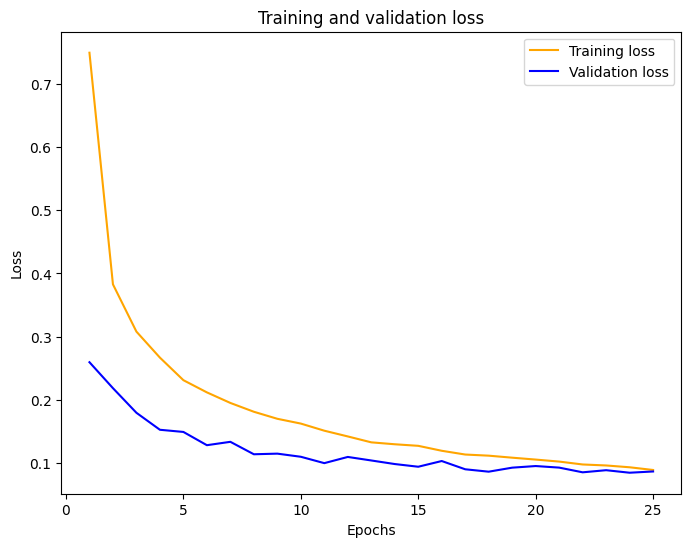

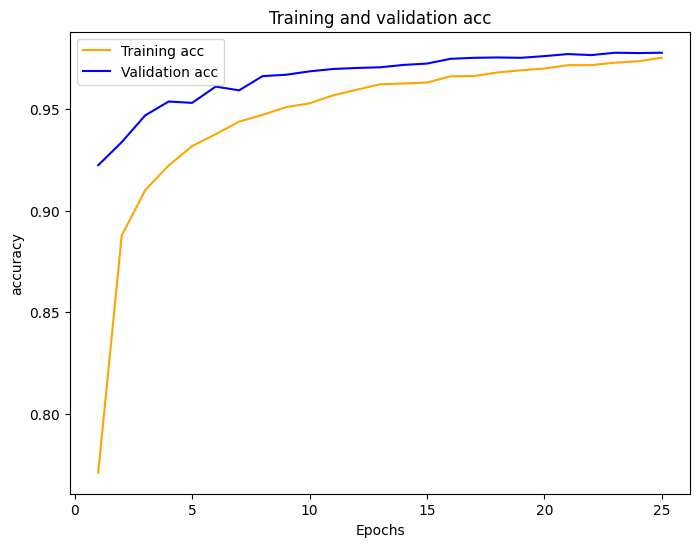

In [84]:
plot_curve(history_dpo)

In [85]:
### Evaluate the model ###
test_loss, test_acc = network_dpo.evaluate(test_images, test_labels)
print('Test Loss of Dropout: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0796 - accuracy: 0.9796
Test Loss of Dropout: 0.07959903031587601
Test Accuracy: 0.9796000123023987


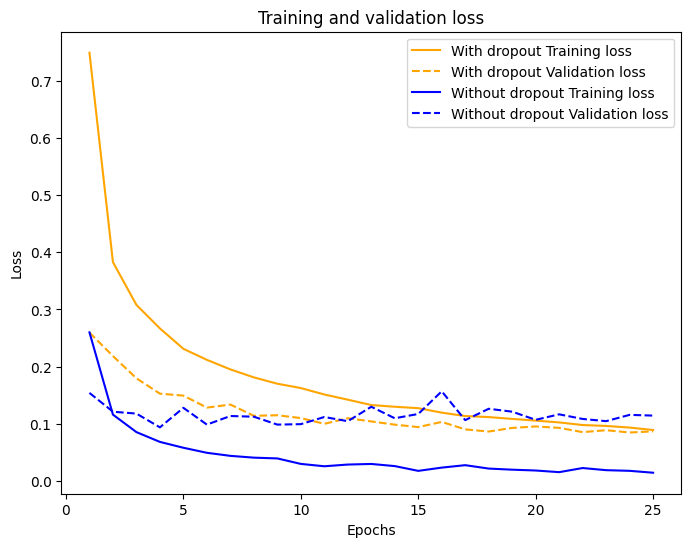

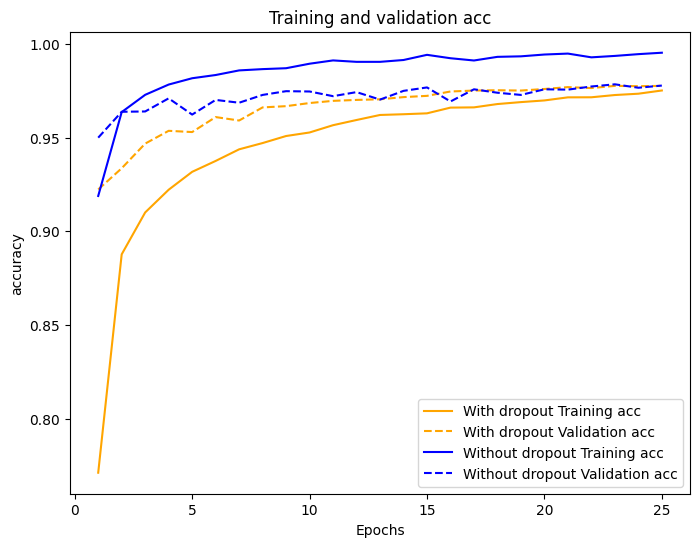

In [86]:
compare_plot(history_dpo, history2, 'With dropout', 'Without dropout')

#### Discussion trying add dropout

กำหนดให้ dropout rate=0.25 พบว่า val_loss < training loss ช่วยลด overfit ของ val_loss ได้ และ gap มีการ generalize

### try to achieve the highest precision

In [346]:
from tensorflow.keras.layers import Dropout
def model_network_tune():
    initializer = tensorflow.keras.initializers.HeNormal()    
    alpha = 1e-6 
    network = models.Sequential()
    network.add(layers.Dense(512, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer
                             , activity_regularizer=regularizers.l2(alpha)))
    network.add(Dropout(0.3))
    network.add(layers.Dense(256, activation='elu'#, kernel_initializer=initializer
                            , activity_regularizer=regularizers.l2(alpha)))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu'#, kernel_initializer=initializer
                             , activity_regularizer=regularizers.l2(alpha)))
    network.add(Dropout(0.2))
    network.add(layers.Dense(64, activation='elu' #, kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l2(alpha)))
    network.add(Dropout(0.1))
    network.add(layers.Dense(10, activation='softmax'))
    
    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    return network

In [347]:
network_tune = model_network_tune()
history_tune = network_tune.fit(X_train, y_train, epochs=50, batch_size=1024 ,validation_data=(X_val, y_val))

Epoch 1/50
53/53 [==============================] - 1s 17ms/step - loss: 0.9993 - accuracy: 0.6765 - val_loss: 0.2588 - val_accuracy: 0.9222
Epoch 2/50
53/53 [==============================] - 0s 9ms/step - loss: 0.3075 - accuracy: 0.9063 - val_loss: 0.1886 - val_accuracy: 0.9383
Epoch 3/50
53/53 [==============================] - 1s 10ms/step - loss: 0.2344 - accuracy: 0.9302 - val_loss: 0.1454 - val_accuracy: 0.9542
Epoch 4/50
53/53 [==============================] - 1s 10ms/step - loss: 0.1925 - accuracy: 0.9425 - val_loss: 0.1299 - val_accuracy: 0.9605
Epoch 5/50
53/53 [==============================] - 1s 10ms/step - loss: 0.1677 - accuracy: 0.9480 - val_loss: 0.1183 - val_accuracy: 0.9620
Epoch 6/50
53/53 [==============================] - 0s 9ms/step - loss: 0.1548 - accuracy: 0.9522 - val_loss: 0.1076 - val_accuracy: 0.9663
Epoch 7/50
53/53 [==============================] - 1s 9ms/step - loss: 0.1421 - accuracy: 0.9556 - val_loss: 0.0987 - val_accuracy: 0.9698
Epoch 8/50
53/53

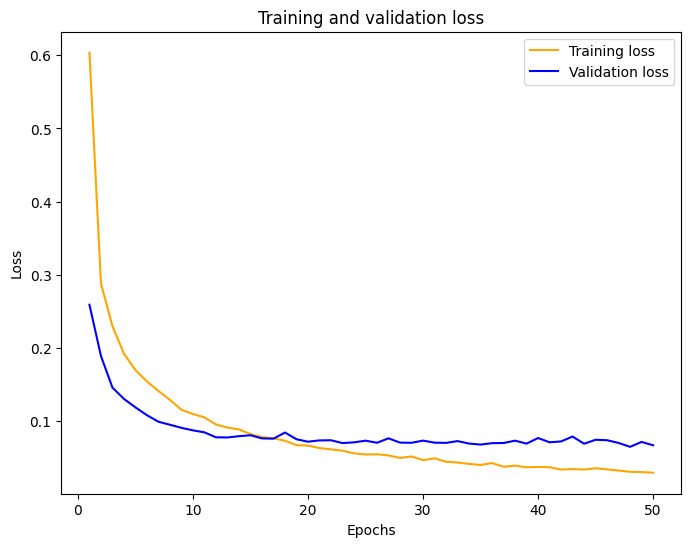

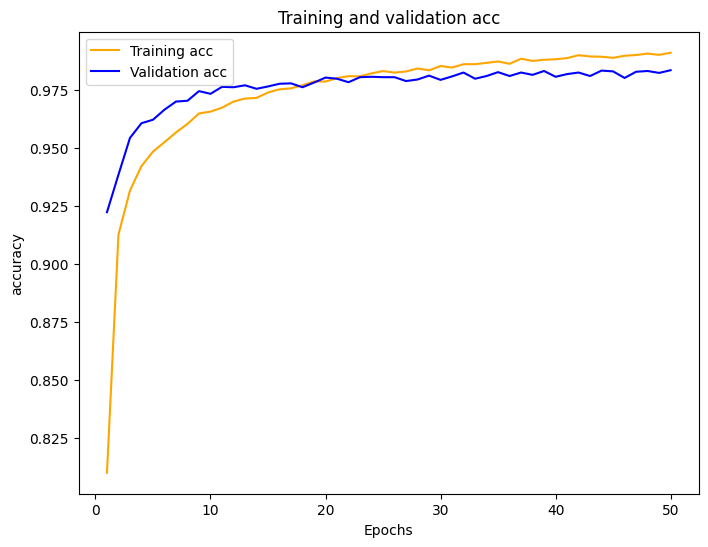

In [348]:
plot_curve(history_tune)

### 7. Final Evaluation

After you've determined that your model is good enough to be deployed in an application, it's time to evaluate it with a test set to ensure that it generalizes well and does not overfit to the validation set.

In [349]:
test_loss, test_acc = network_tune.evaluate(test_images, test_labels)
print('Test Loss of model tuning: %s\nTest Accuracy of model tuning: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0605 - accuracy: 0.9843
Test Loss of model tuning: 0.06045669689774513
Test Accuracy of model tuning: 0.9843000173568726


In [350]:
test_pred = network_tune.predict(test_images)

In [351]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

y_labels = np.argmax(test_labels, axis=1)
y_pred = np.argmax(test_pred, axis=1)
cf_matrix = confusion_matrix(y_labels, y_pred)
df = pd.DataFrame(cf_matrix)
class_names = []
for i in range(10):
    class_names.append(str(i))

In [352]:
df

0     1     2    3    4    5    6     7    8    9
0  975     0     1    1    0    0    1     1    1    0
1    0  1124     4    0    0    1    2     0    4    0
2    1     1  1017    4    1    0    1     3    3    1
3    1     0     2  994    0    3    0     4    3    3
4    1     0     1    1  961    0    4     2    1   11
5    2     0     0   10    1  869    4     1    4    1
6    2     2     0    1    3    4  943     0    3    0
7    2     2     5    2    0    0    0  1008    3    6
8    2     0     2    4    1    2    0     3  958    2
9    2     2     0    2    4    1    0     2    2  994

In [353]:
print("\n"+ classification_report(y_labels, y_pred, target_names=class_names))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### Discussion about final evaluation try to achieve higher precision accurary

เมื่อลองหลายวิธีในการเพิ่มประสิทธิภาพของโมเดลให้มี accuracy สูงขึ้น พบว่าทำได้มากสุด acc=98.43%, loss=0.06 จากที่ทดลองทำทั้งหมด ในการทำ tune model จะเลือกใช้ dropout ที่ 0.3, 0.25, 0.2, 0.1 แต่ละ layer และใช้ L2 Activity เพื่อลด overfit และ noise ของโมเดล และเมื่อลองปรับ learning rate ไปด้วย พบว่า ยิ่ง lr > 1e-4 ขึ้นไป จะทำให้ gap นั้น มีความ generalize มากยิ่งขึ้น แต่ถ้า lr < 1e-3 จะทำให้ val_loss สวิงไปมา และเกิด overfit ได้ เนื่องจาก step ในการหา minimum cost นั้นใหญ่เกินไป

### Result & Discussion 

- Summarize the main findings from this lab. Discuss what you did, what you got as a result, and why (support your reason)

### 8. Play with your model

1. Create a 28x28 pixel (any resolution) drawing in any drawing application (for example, Paint or Adobe Photoshop) with a black (#000000) background and white (#FFFFFF) paint.

2. Draw three distinct single digit numbers from 0 to 9. The images should then be saved in PNG format.

3. Install open-cv by
    <br/>for local pc :
 (See https://pypi.org/project/opencv-python)  
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)

    for colab use:
```import cv2 as cv```

4. Load your images to this IPython using the ```imread()``` function
5. Preprocess the images in the same way you did during the development process.
6. Feed your images to your best model.

What class does your model predict? Is it correct? If not, why does it still get a wrong result when your model is more than 90% accurate?

In [359]:
import cv2
import glob as gb
import os

path = './myDigit'
img_dataset = []

files = gb.glob(path+'/*.png')
for file in files:
    n = cv2.imread(file,1)
    gray_image = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY)
    img_dataset.append(gray_image)    
        
# for img in os.listdir(path):
#     files=gb.glob(path+'/*.jpg')
#     for file in files:
#         n = cv2.imread(file,1)
#         img_dataset.append(n)      

img_dataset = np.array(img_dataset)

In [360]:
img_dataset.shape

(30, 28, 28)

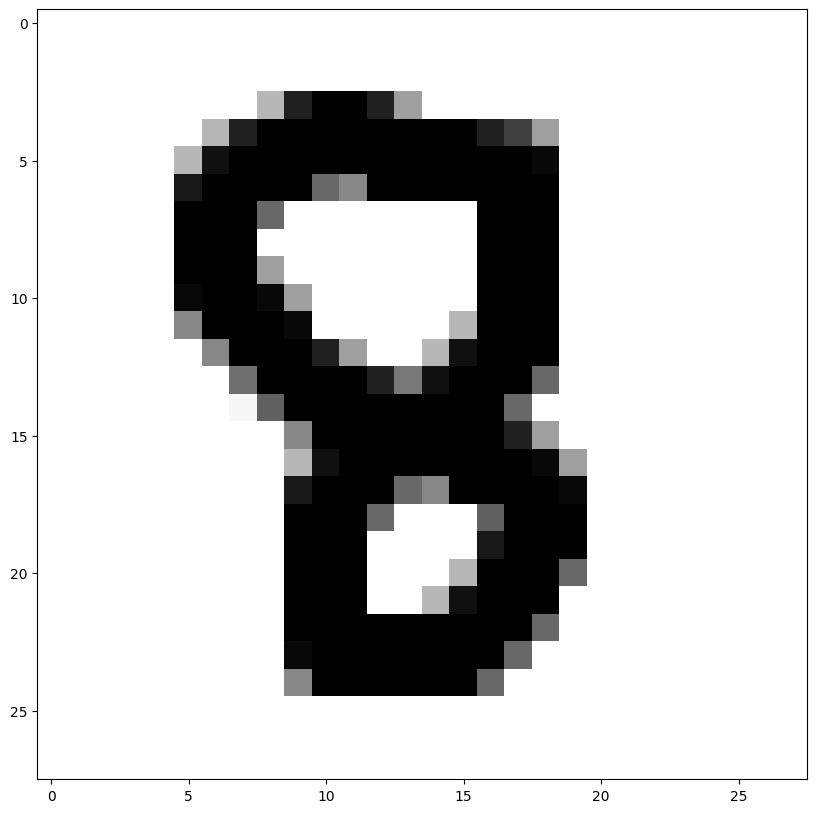

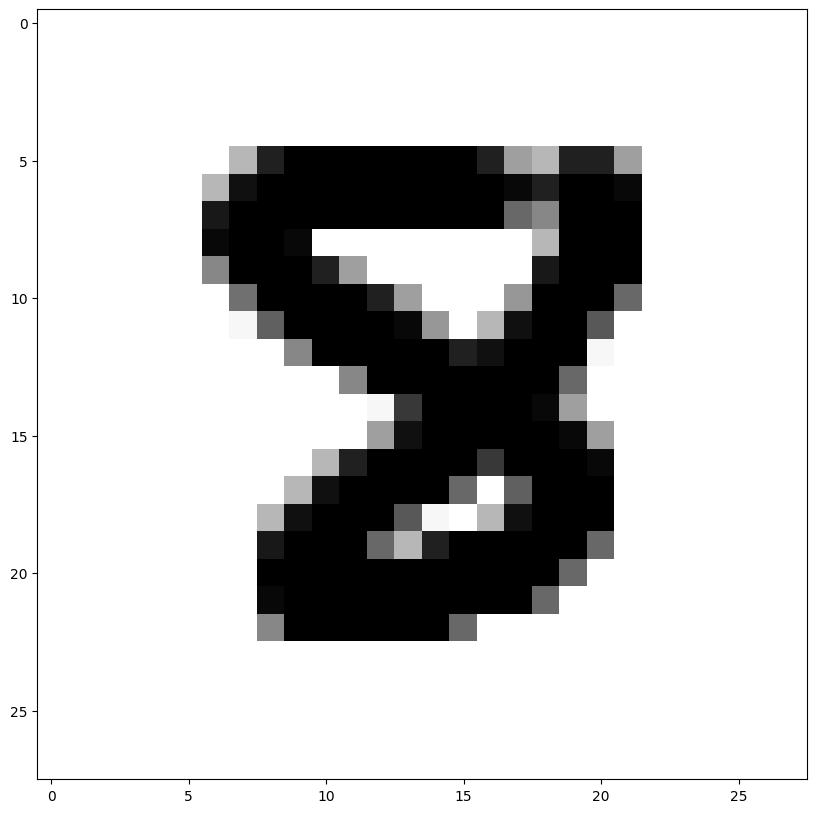

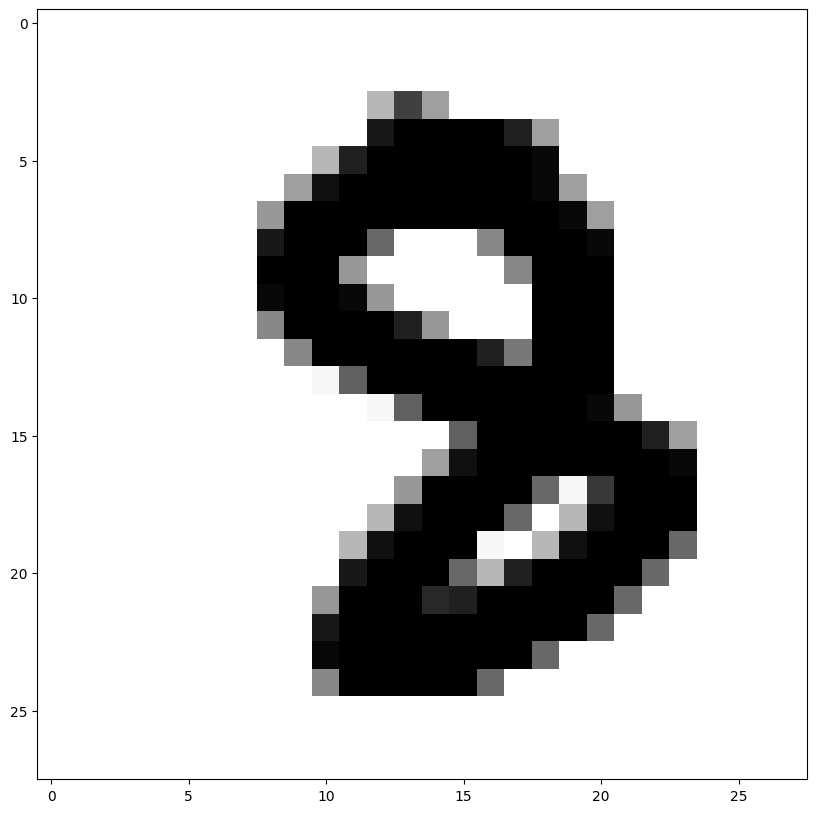

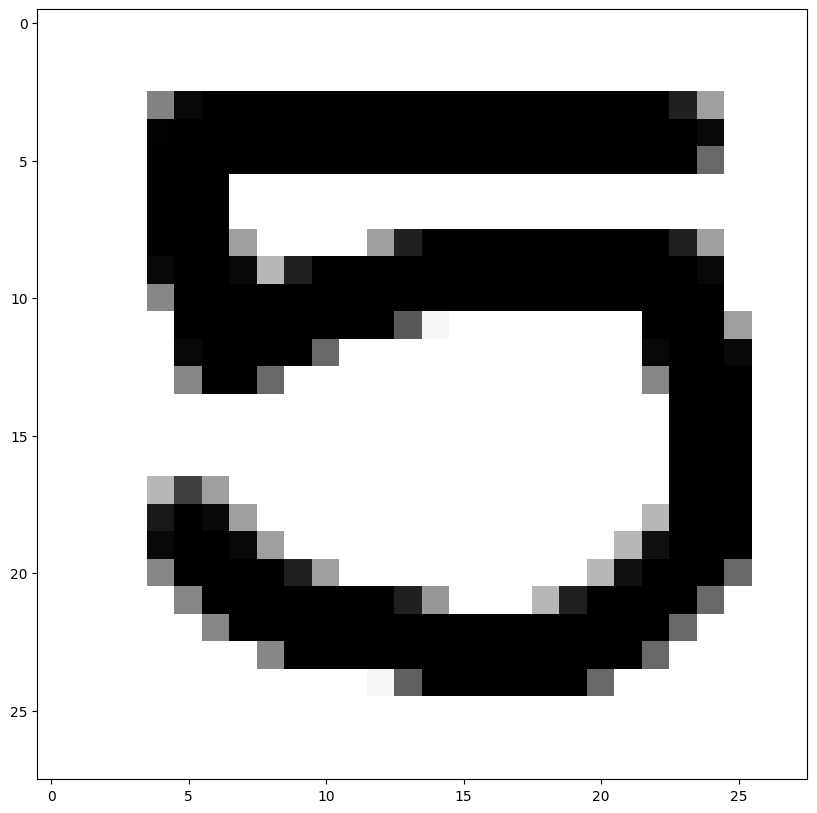

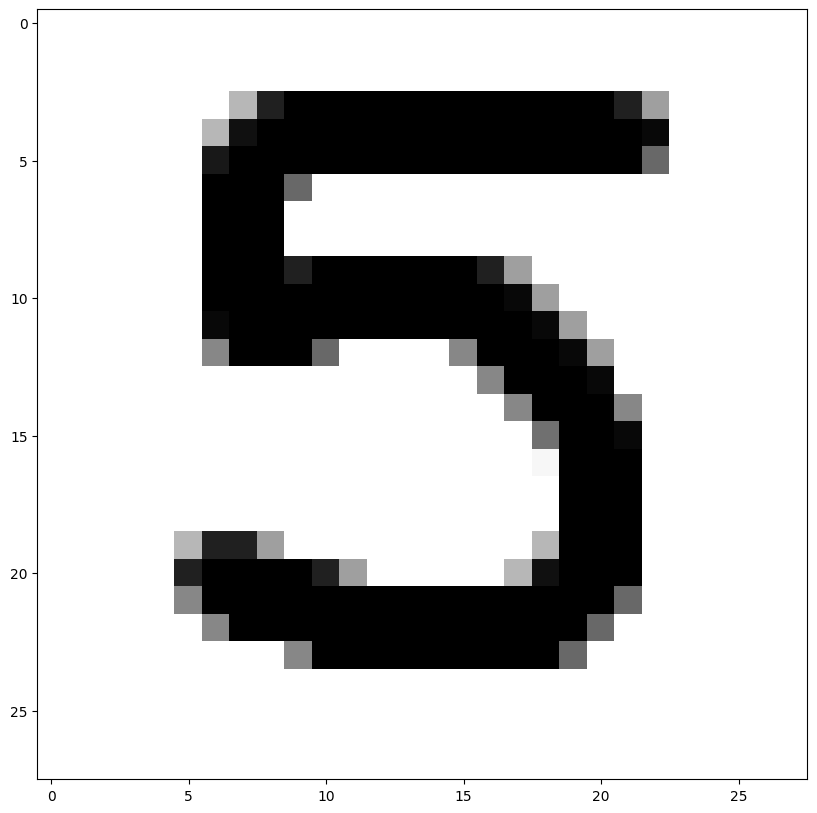

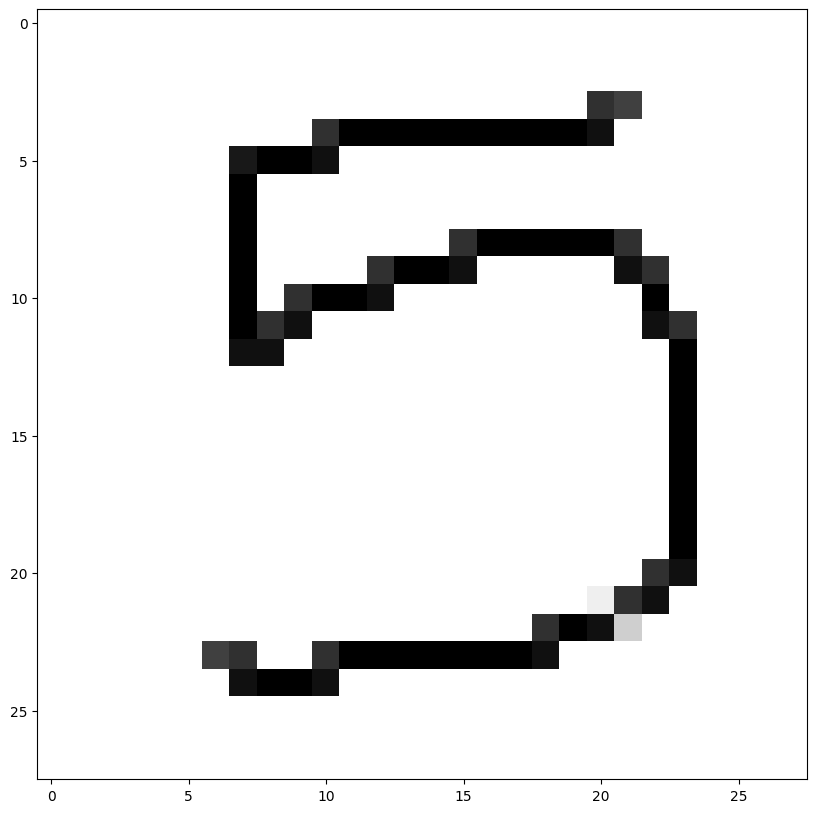

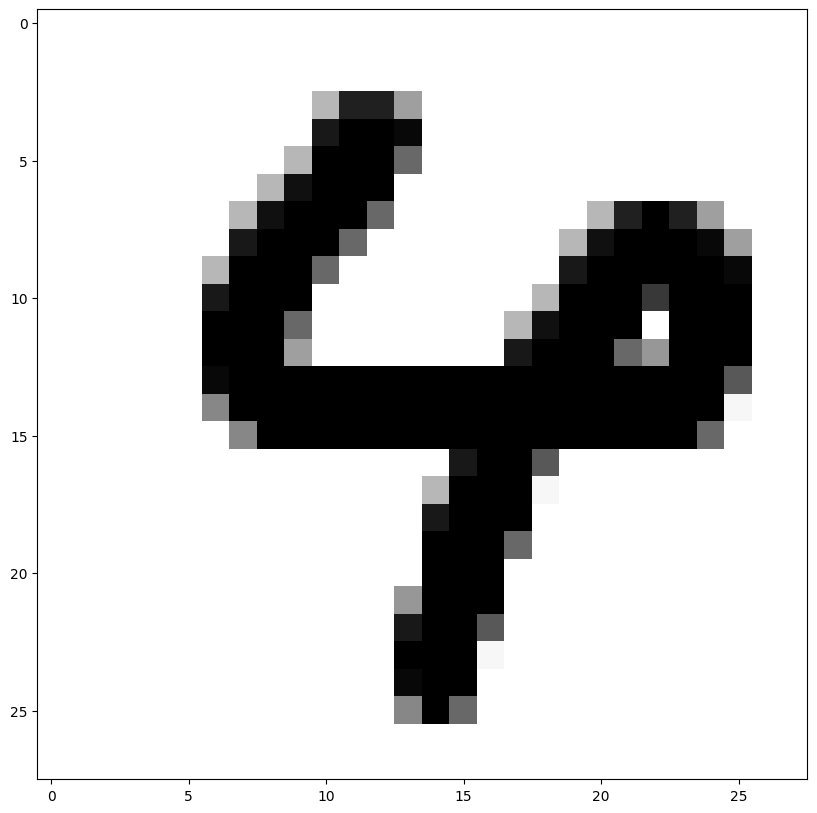

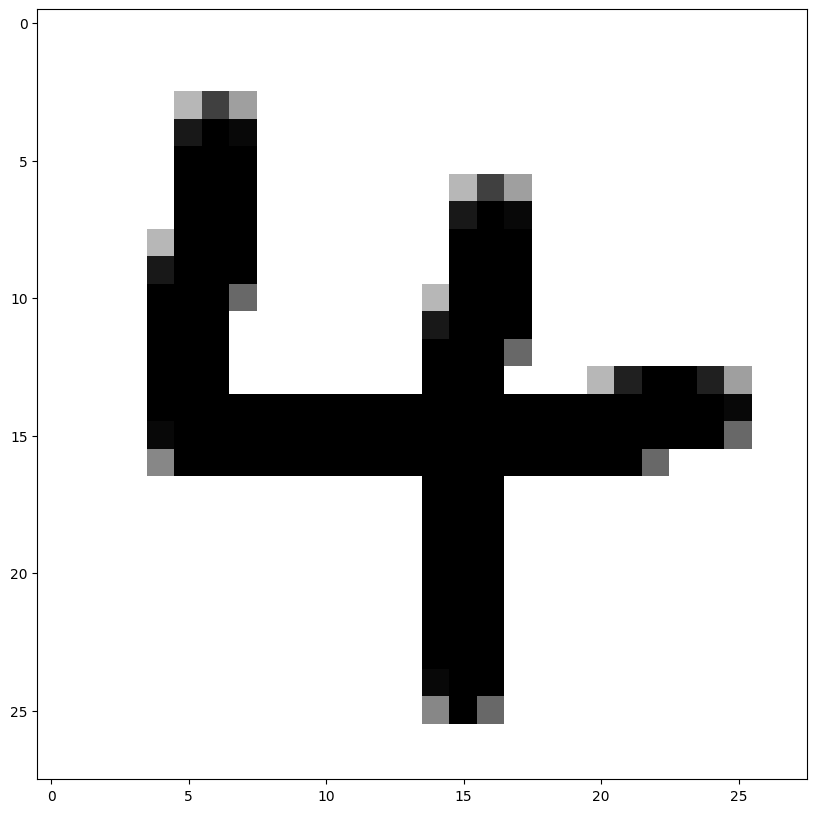

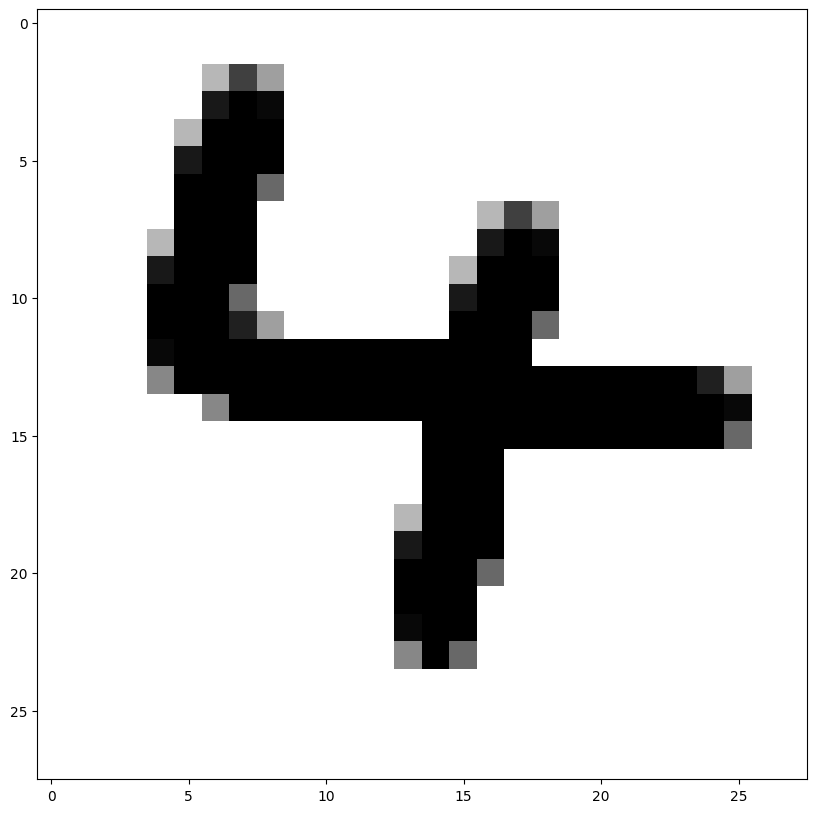

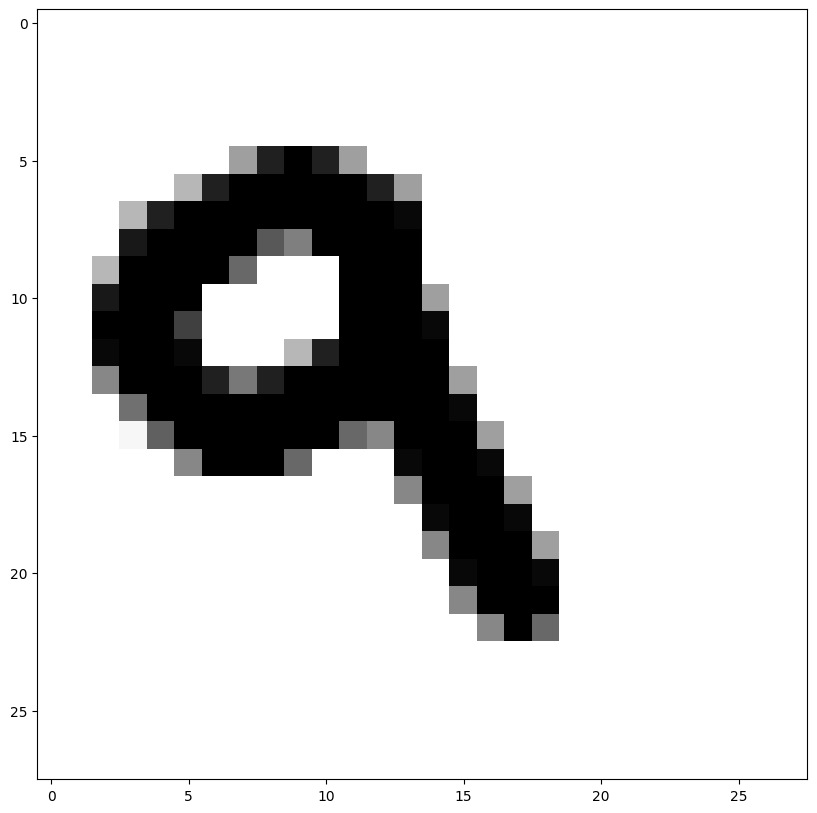

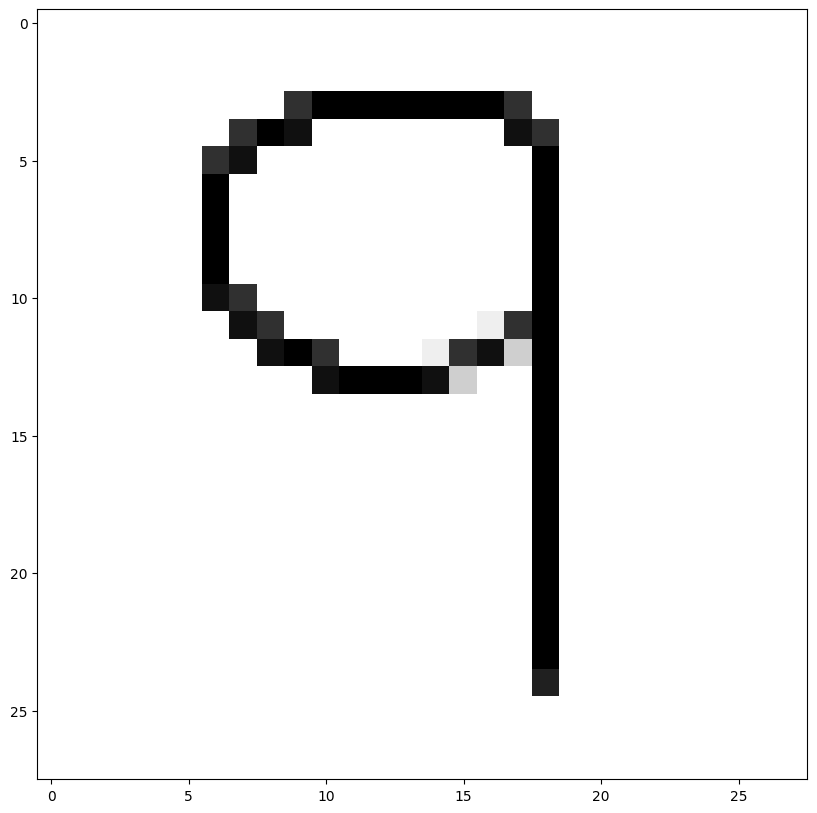

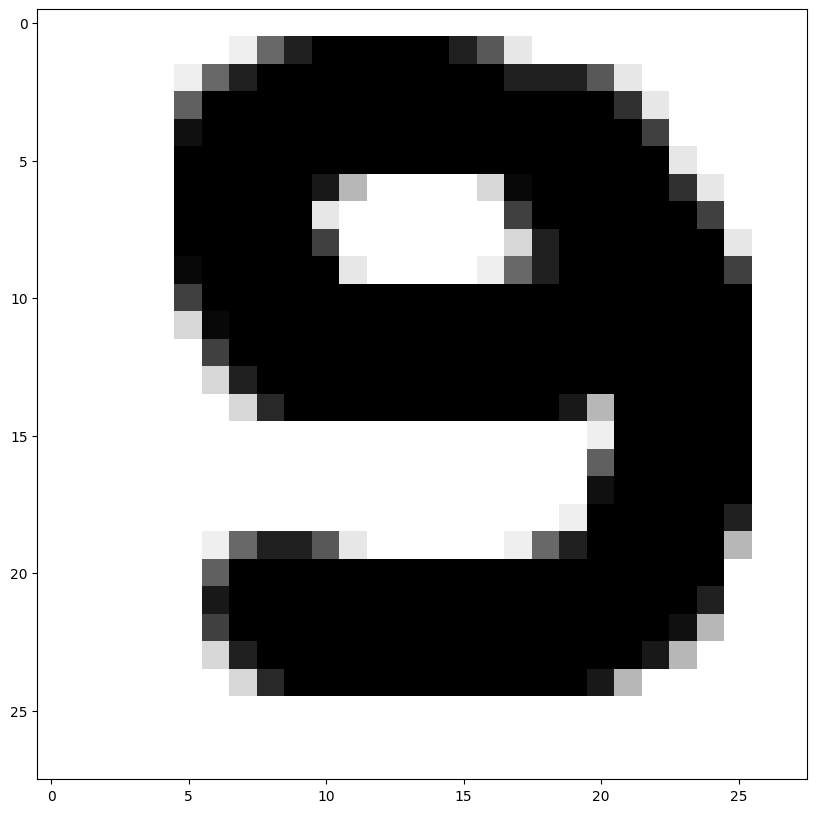

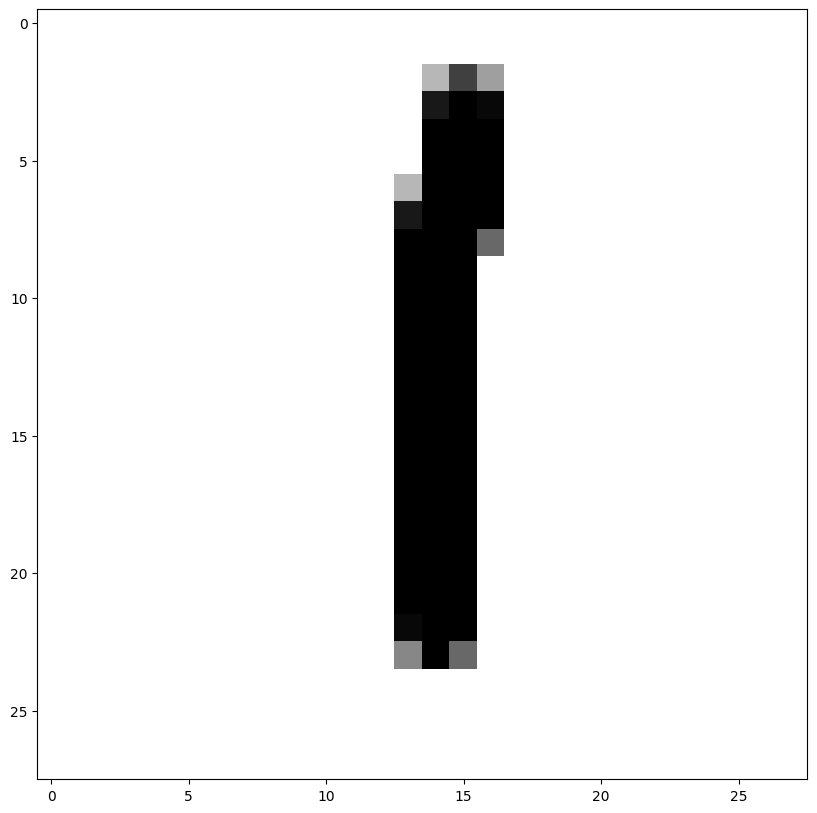

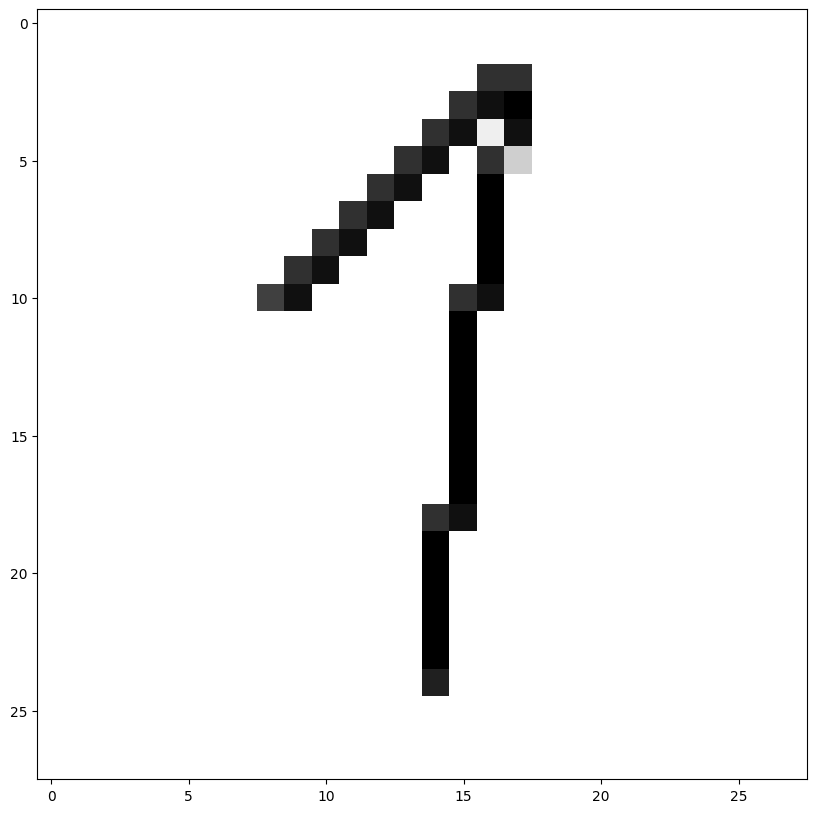

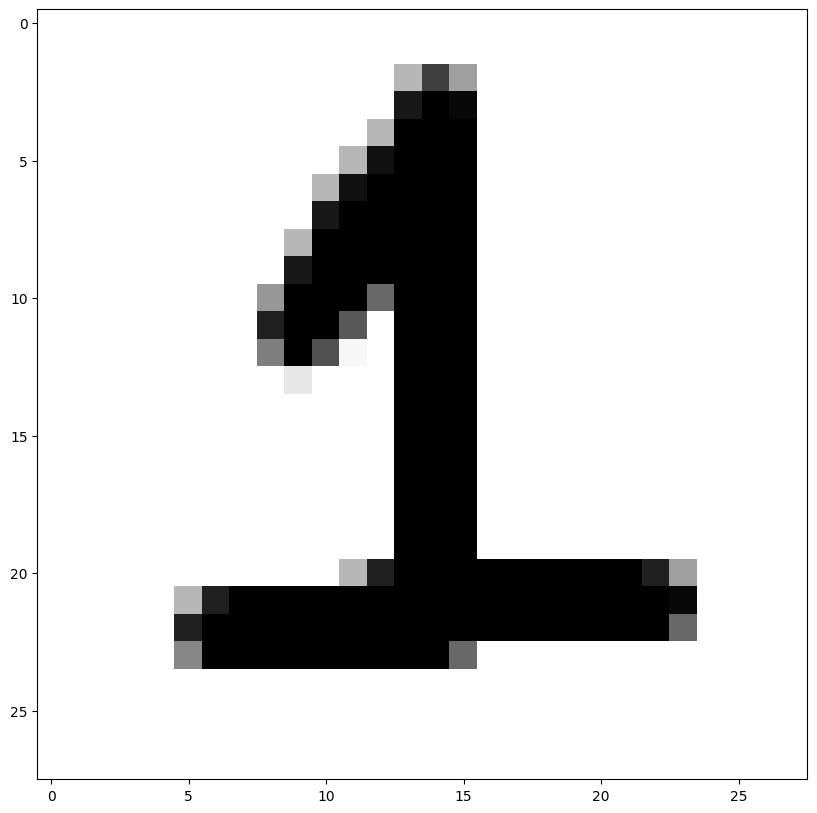

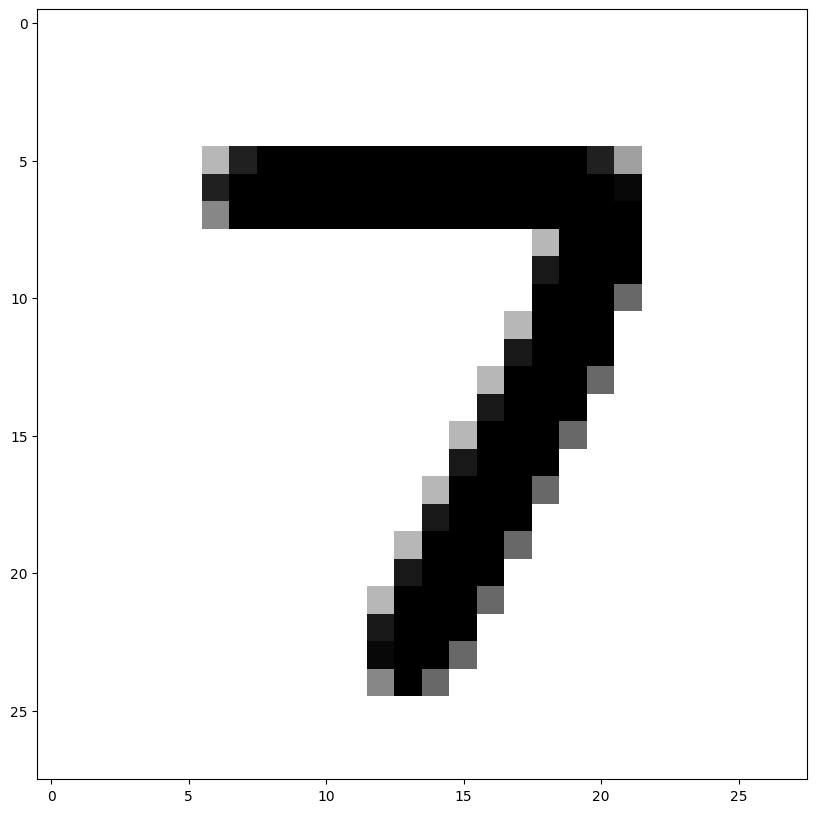

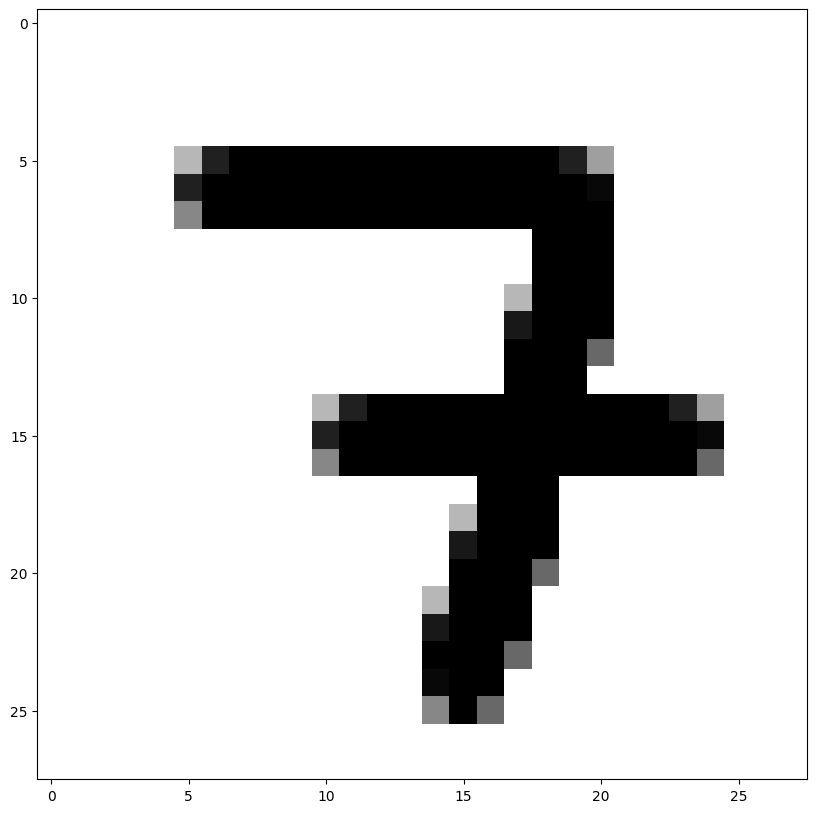

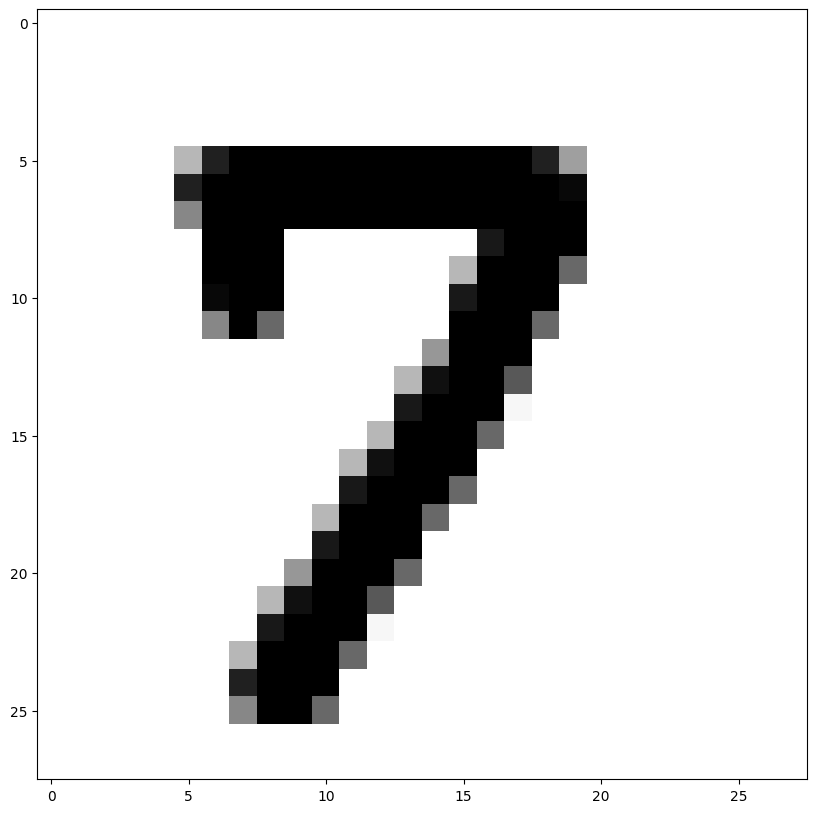

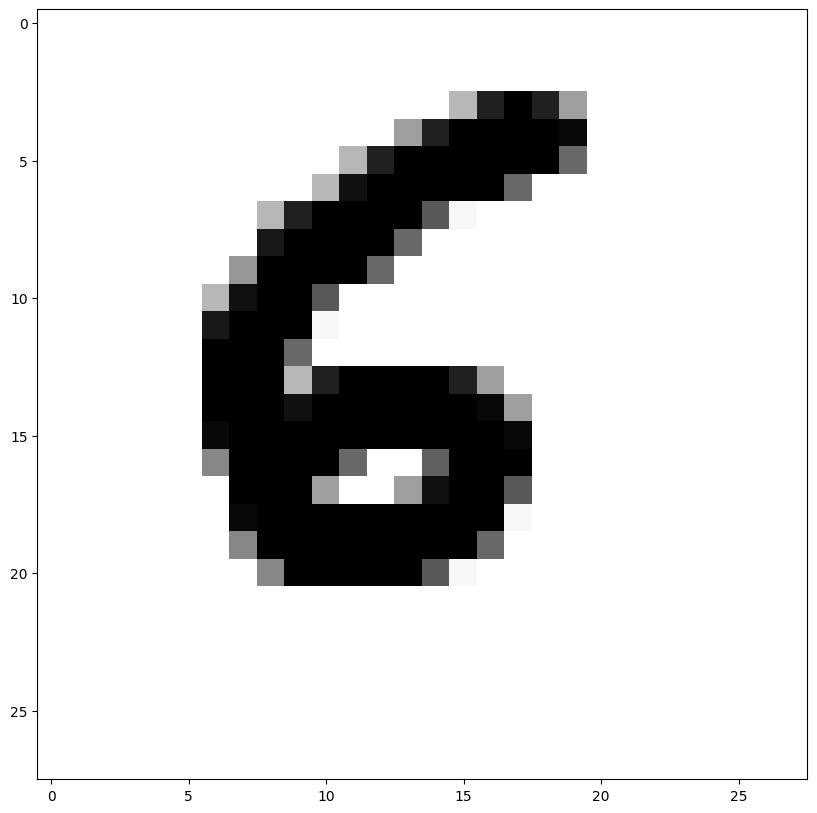

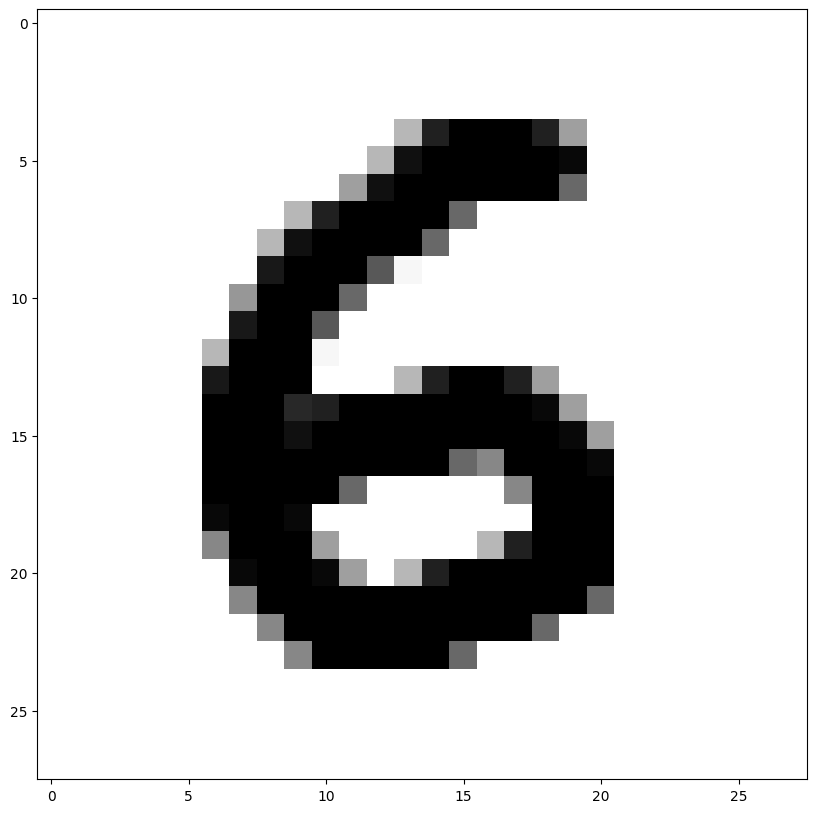

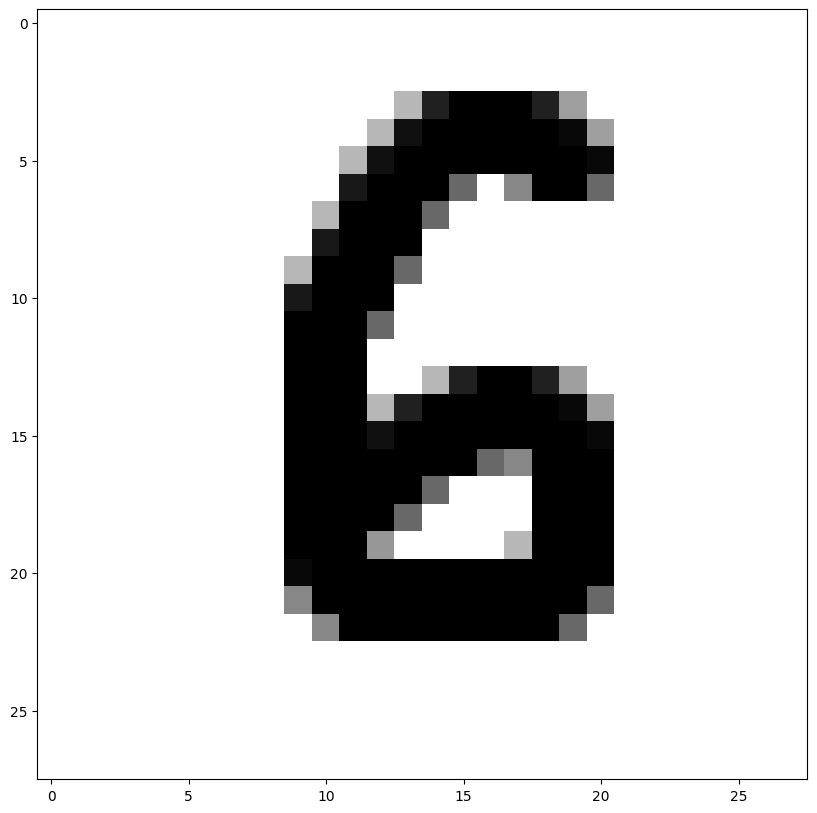

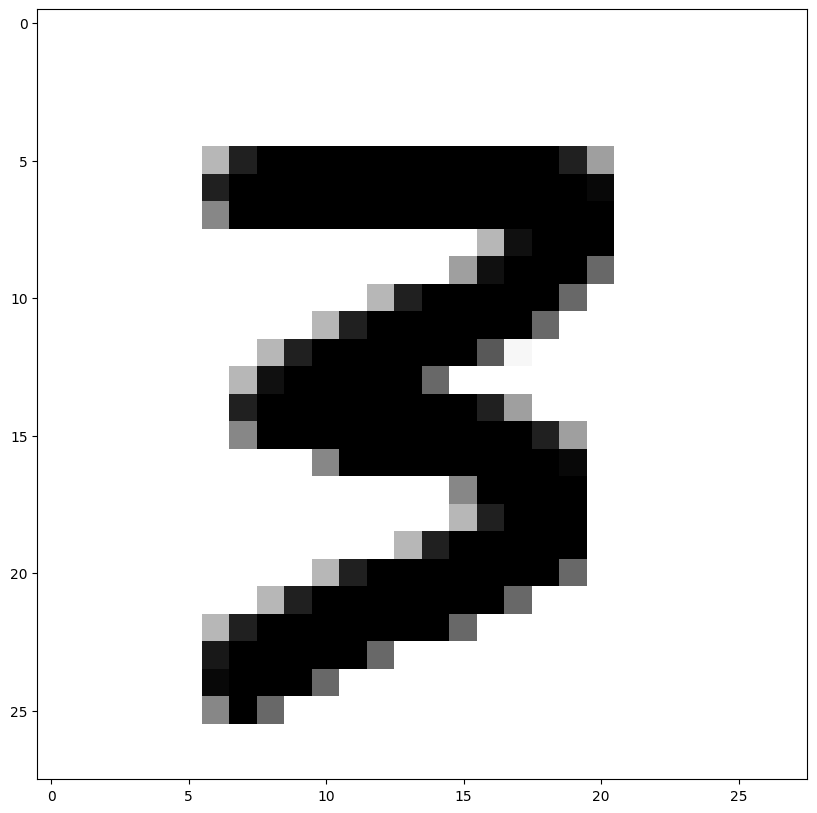

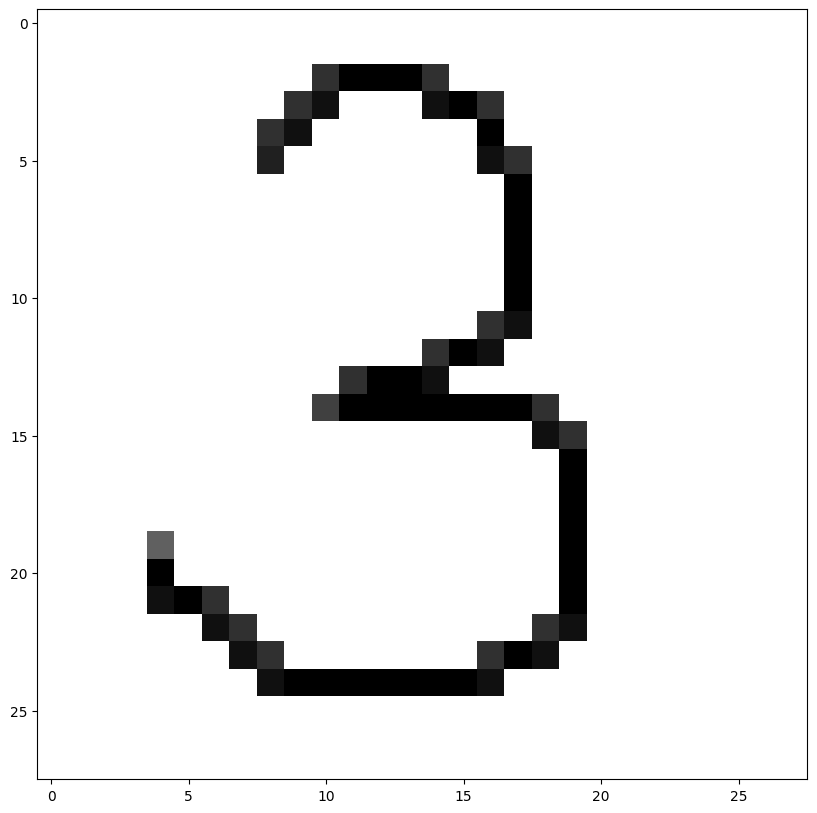

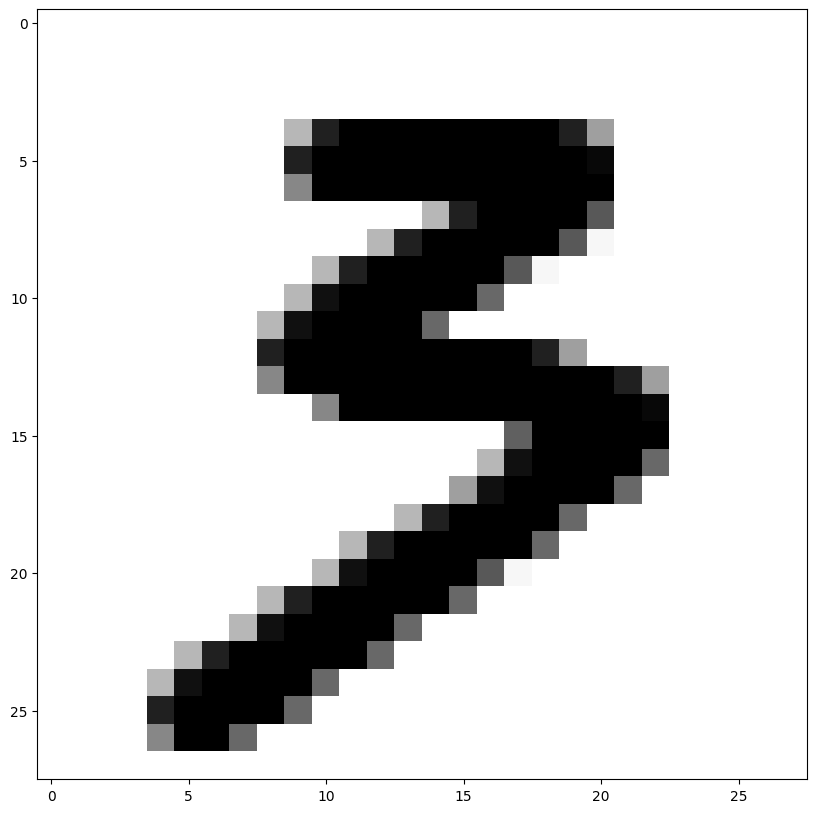

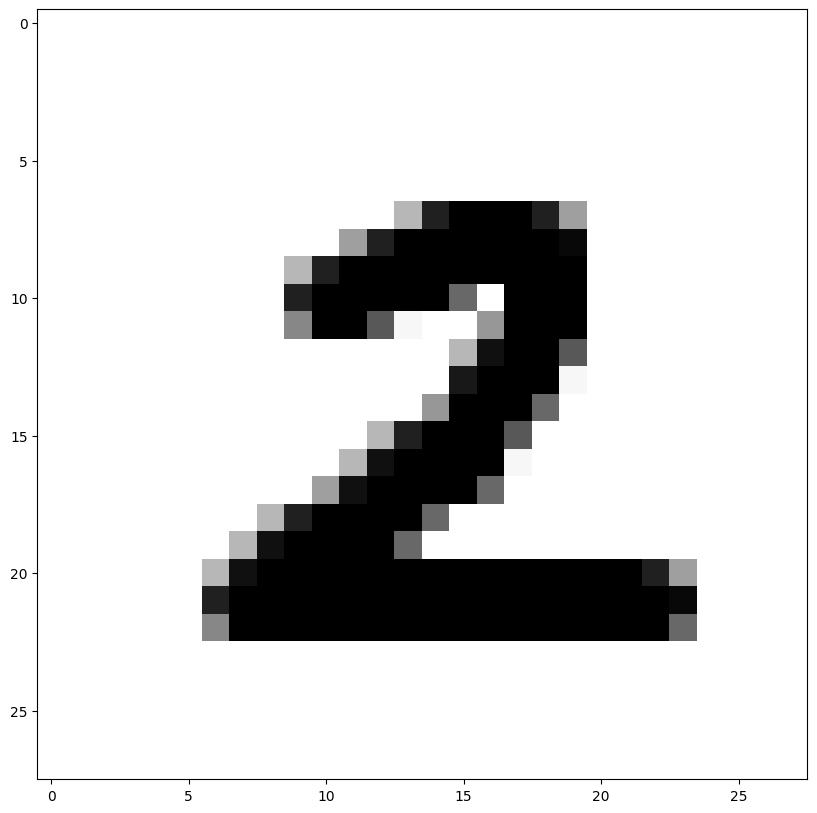

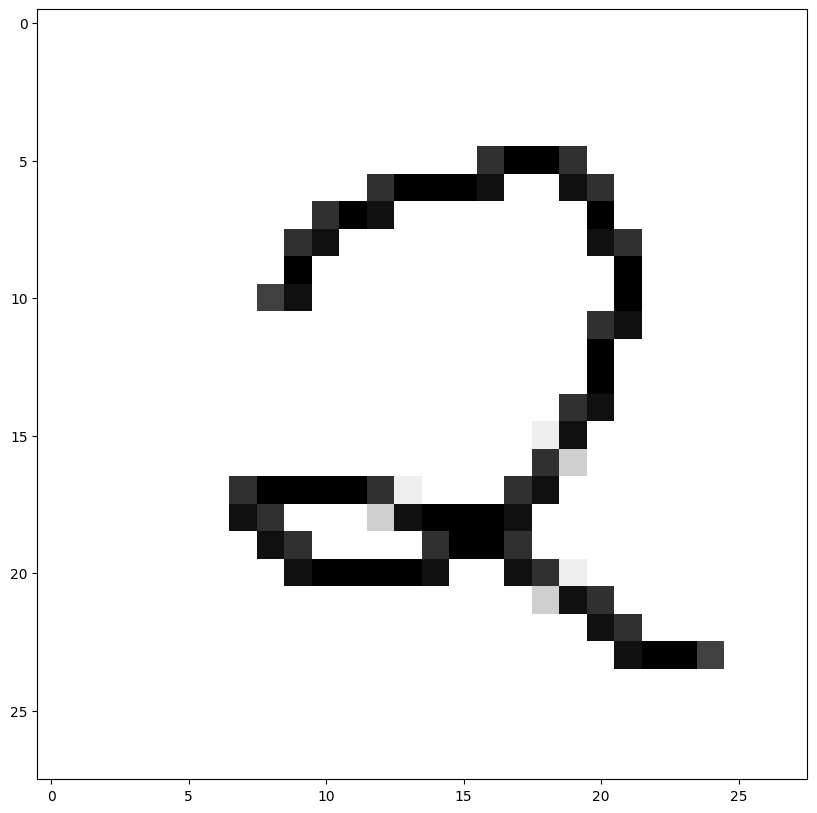

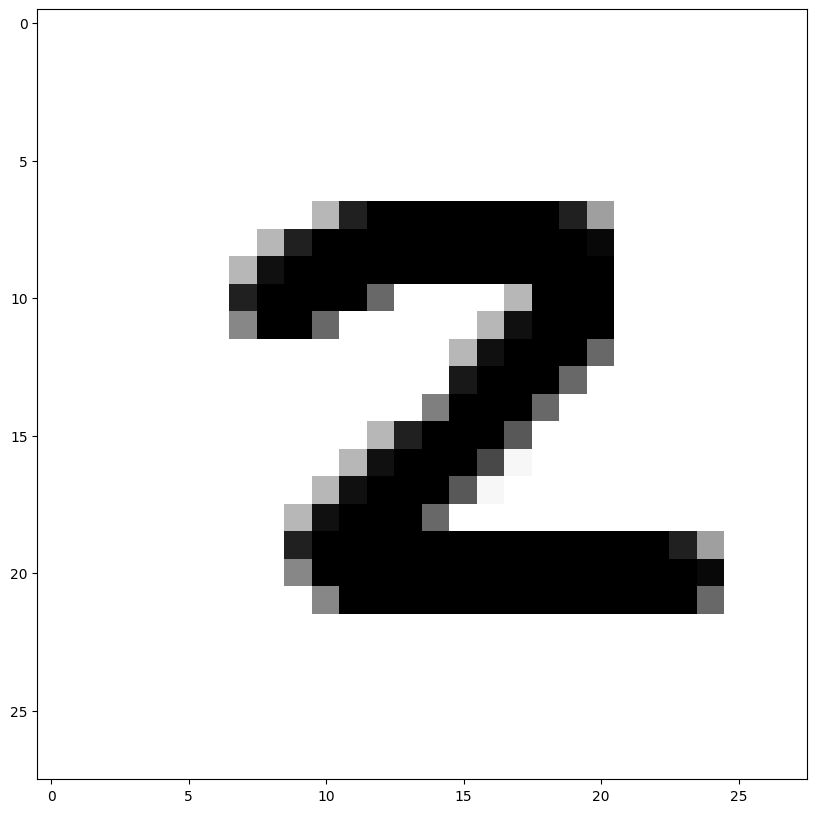

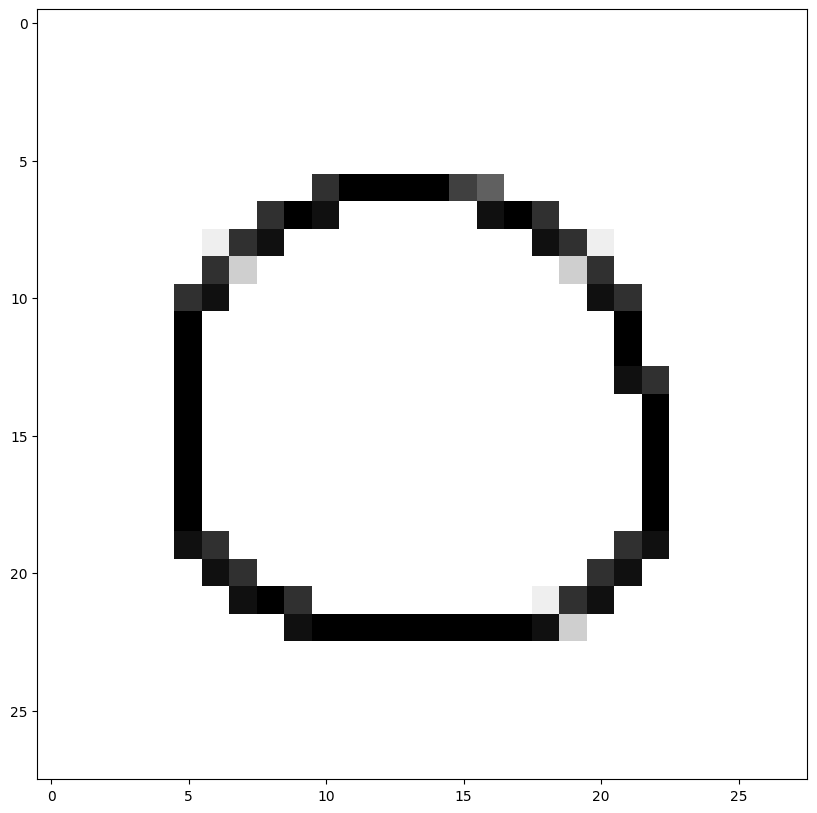

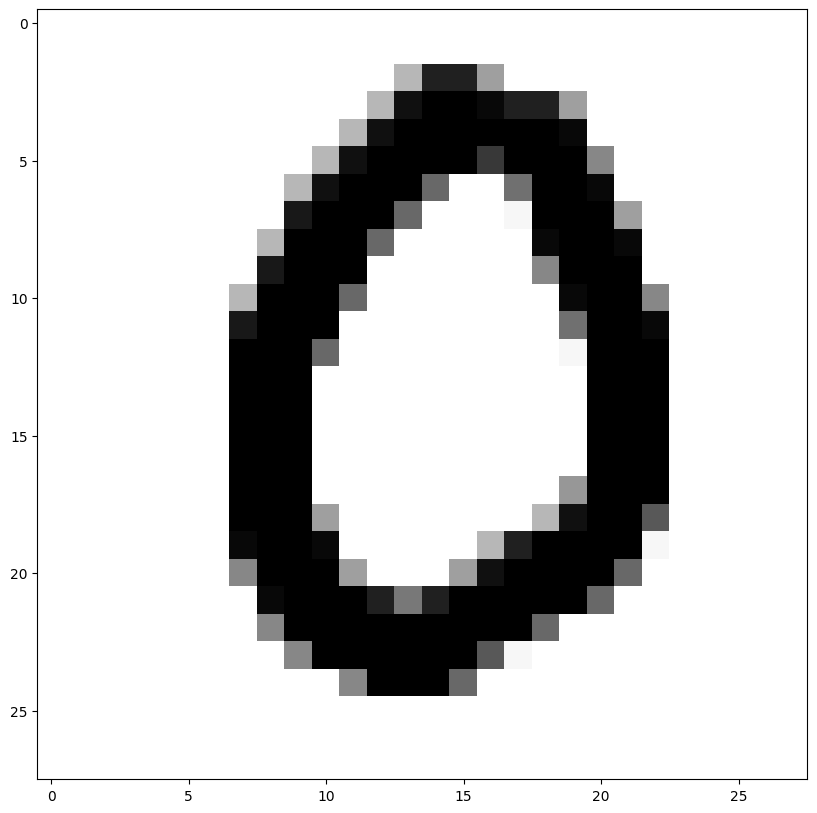

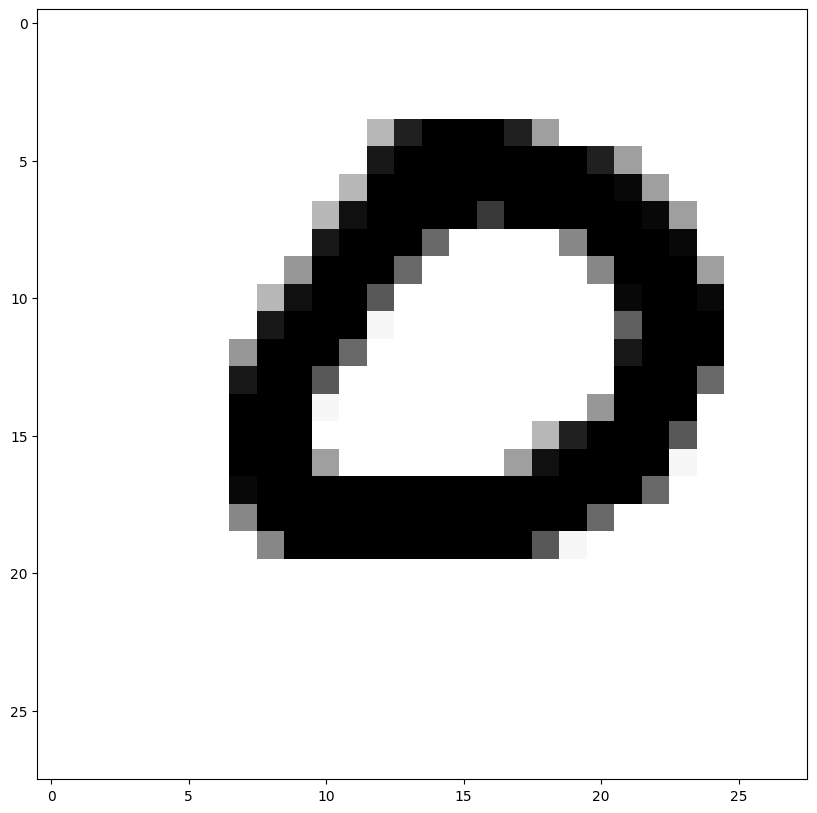

In [361]:
for i in range(len(img_dataset)):
    plt.imshow(img_dataset[i], cmap=plt.cm.binary)
    plt.show()

In [362]:
# Reshape and Normalize
img_dataset = img_dataset.reshape(30, 28*28)
img_dataset = img_dataset.astype('float32')/255

In [363]:
myPred = network_tune.predict(img_dataset)
def playModel(myPred,idx):
    img = img_dataset[idx].reshape(28,28)
    plt.imshow(img)
    probLabel = myPred[idx]
    label = str(probLabel.argmax())
    plt.text(-1, 10, s = label, fontsize=16, color='cyan')
    plt.axis('off')

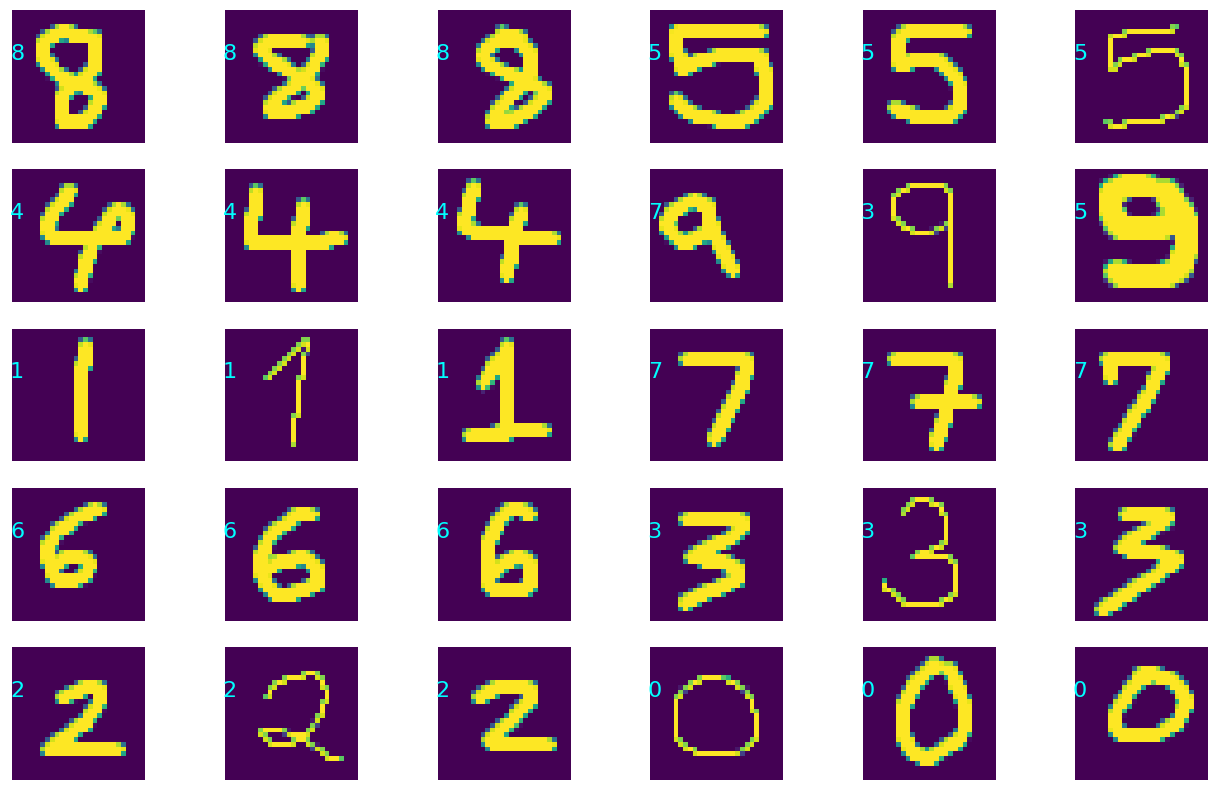

In [364]:
plt.rcParams["figure.figsize"] = [16,10]
for idx in range(30):
    plt.subplot(5,6,idx+1)
    playModel(myPred,idx)
plt.show()

### Challenges: Play with initializer

- Build a two-layer neural network with any hyperparameter
- Use or create a weight initializer function that sets all the weights to one. See: https://keras.io/initializers/
- Discuss the results. What happened? and why?

In [ ]:
import tensorflow
from tensorflow.keras import initializers

In [ ]:
initializer1 = tensorflow.keras.initializers.Ones()
values1 = initializer1(shape=(28,28))
values1

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(128, activation='elu', input_shape=(28*28,),kernel_initializer=initializer1))
# model1.add(layers.Dense(128, activation='elu',kernel_initializer=initializer))
model1.add(layers.Dense(10, activation='softmax')) 

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model1.summary()

In [ ]:
histoy_model1 = model1.fit(X_train, y_train, epochs=10, batch_size=128 ,validation_data=(X_val, y_val))

In [ ]:
plot_curve(histoy_model1)

In [ ]:
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels,verbose=0)
print('Test Loss of model Ones initializer: %s\nTest Accuracy of model Ones initializer: %s' % (test_loss1,test_acc1))
print('\n')
test_loss, test_acc = network1.evaluate(test_images, test_labels,verbose=0)
print('Test Loss of model He initializer: %s\nTest Accuracy of model He initializer: %s' % (test_loss,test_acc))

In [ ]:
compare_plot(histoy_model1, history, 'Ones initializer', 'He initializer')

#### Discussion

 จากการลองเล่น